# kaggle-competition

- train.csv: training set
- test.csv: test set
- sample_submission.csv: sample submission
- Features
- id: only for test & sample submission files, id for prediction sample identification
- price: price in USD
- carat: weight of the diamond
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour
- clarity: a measurement of how clear the diamond is
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)

In [729]:
import pandas as pd
import numpy as np
import sidetable
import src as sp
from scipy import stats
import math

#librerias limpieza de nulos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

#Normalizacion
from sklearn.preprocessing import MinMaxScaler


#Estandarización
## esto es un metodo que estandariza automaticamente todas las columnas del dataframe que le pasemos
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#Normalizacion
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder



#libreria para el balanceo
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from xgboost import XGBRegressor
from  sklearn.ensemble import GradientBoostingRegressor


# para calcular las métricas regresion logistica
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [730]:
df_train = pd.read_csv("data/train.csv", index_col= False)
df_train.head()

id  carat        cut color clarity  depth  table     x     y     z  price
0   0   0.30    Premium     D     SI2   62.4   58.0  4.31  4.28  2.68  6.353
1   1   1.01      Ideal     E    VVS2   62.7   56.0  6.42  6.46  4.04  9.183
2   2   0.72      Ideal     F     VS2   61.8   59.0  5.71  5.74  3.54  7.983
3   3   1.08  Very Good     G     SI2   63.2   57.0  6.54  6.50  4.12  8.371
4   4   0.36    Premium     G     VS1   62.3   59.0  4.50  4.55  2.82  6.588

In [731]:
df_test = pd.read_csv("data/test.csv",index_col= False)
df_test.head()

id  carat      cut color clarity  depth  table     x     y     z
0   0   0.32    Ideal     I     SI1   60.5   58.0  4.43  4.49  2.70
1   1   1.24  Premium     I     SI1   62.9   60.0  6.80  6.74  4.26
2   2   1.66  Premium     D     SI1   62.0   59.0  7.55  7.60  4.70
3   3   0.75  Premium     D     SI2   60.6   56.0  5.94  5.90  3.59
4   4   1.50     Fair     E     SI2   64.8   55.0  7.26  7.15  4.67

In [732]:
df_train.shape

(40455, 11)

In [733]:
df_test.shape

(13485, 10)

In [734]:
df_train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [735]:
df_test.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [736]:
df_test.duplicated().sum()

0

No hay nulos ni duplicados, es un data set muy limpio.

In [737]:
# Exploramos los tipos de los datos que tenemos
df_train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [738]:
df_test.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [739]:
df_train.describe().T

count          mean           std     min        25%       50%  \
id     40455.0  20227.000000  11678.496907   0.000  10113.500  20227.00   
carat  40455.0      0.797576      0.475939   0.200      0.400      0.70   
depth  40455.0     61.746377      1.436796  43.000     61.000     61.80   
table  40455.0     57.451694      2.234569  44.000     56.000     57.00   
x      40455.0      5.729163      1.125244   0.000      4.710      5.69   
y      40455.0      5.732896      1.154799   0.000      4.720      5.70   
z      40455.0      3.537351      0.711002   0.000      2.910      3.52   
price  40455.0      7.783822      1.016828   5.787      6.851      7.78   

             75%        max  
id     30340.500  40454.000  
carat      1.040      5.010  
depth     62.500     79.000  
table     59.000     95.000  
x          6.540     10.740  
y          6.540     58.900  
z          4.030     31.800  
price      8.581      9.842

In [740]:
df_test.describe().T

count         mean          std   min      25%      50%       75%  \
id     13485.0  6742.000000  3892.928525   0.0  3371.00  6742.00  10113.00   
carat  13485.0     0.799032     0.468195   0.2     0.40     0.71      1.04   
depth  13485.0    61.758487     1.420037  50.8    61.10    61.90     62.50   
table  13485.0    57.473652     2.234259  43.0    56.00    57.00     59.00   
x      13485.0     5.737139     1.111265   0.0     4.73     5.71      6.54   
y      13485.0     5.739416     1.103297   0.0     4.74     5.72      6.54   
z      13485.0     3.542883     0.689553   0.0     2.92     3.53      4.04   

            max  
id     13484.00  
carat      4.13  
depth     79.00  
table     73.00  
x         10.14  
y         10.10  
z          6.43

Tenemos unas medidas numericas muy parecidas entre el test y el train.

In [741]:
# exploramos variables categóricas

df_train.describe(include  = ["object", "category"]).T

count unique    top   freq
cut      40455      5  Ideal  16230
color    40455      7      G   8410
clarity  40455      8    SI1   9779

In [742]:
df_train.head()

id  carat        cut color clarity  depth  table     x     y     z  price
0   0   0.30    Premium     D     SI2   62.4   58.0  4.31  4.28  2.68  6.353
1   1   1.01      Ideal     E    VVS2   62.7   56.0  6.42  6.46  4.04  9.183
2   2   0.72      Ideal     F     VS2   61.8   59.0  5.71  5.74  3.54  7.983
3   3   1.08  Very Good     G     SI2   63.2   57.0  6.54  6.50  4.12  8.371
4   4   0.36    Premium     G     VS1   62.3   59.0  4.50  4.55  2.82  6.588

In [743]:
# exploramos variables categóricas

df_test.describe(include  = ["object", "category"]).T

count unique    top  freq
cut      13485      5  Ideal  5321
color    13485      7      G  2882
clarity  13485      8    SI1  3286

## Análisis exploratorio visual

# Variable respuesta

Vemos como esta distribuida la variable respuesta, en este caso precio.

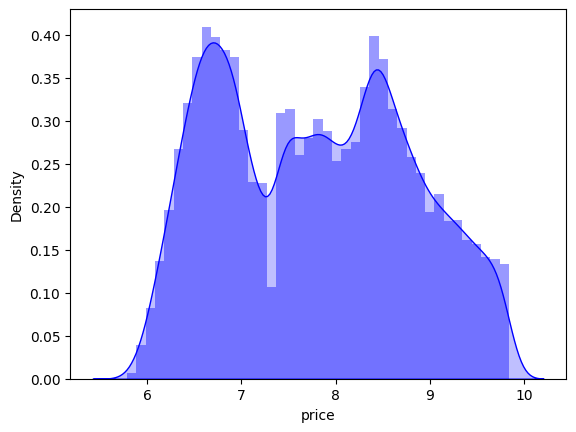

In [744]:
sns.distplot(
    df_train.price,  
    color = "blue", 
    kde = True,
    kde_kws = {"shade": True, "linewidth": 1});

## Variables predictoras

In [745]:
df_train_num = df_train.select_dtypes(include=np.number)
df_test_num = df_test.select_dtypes(include=np.number)


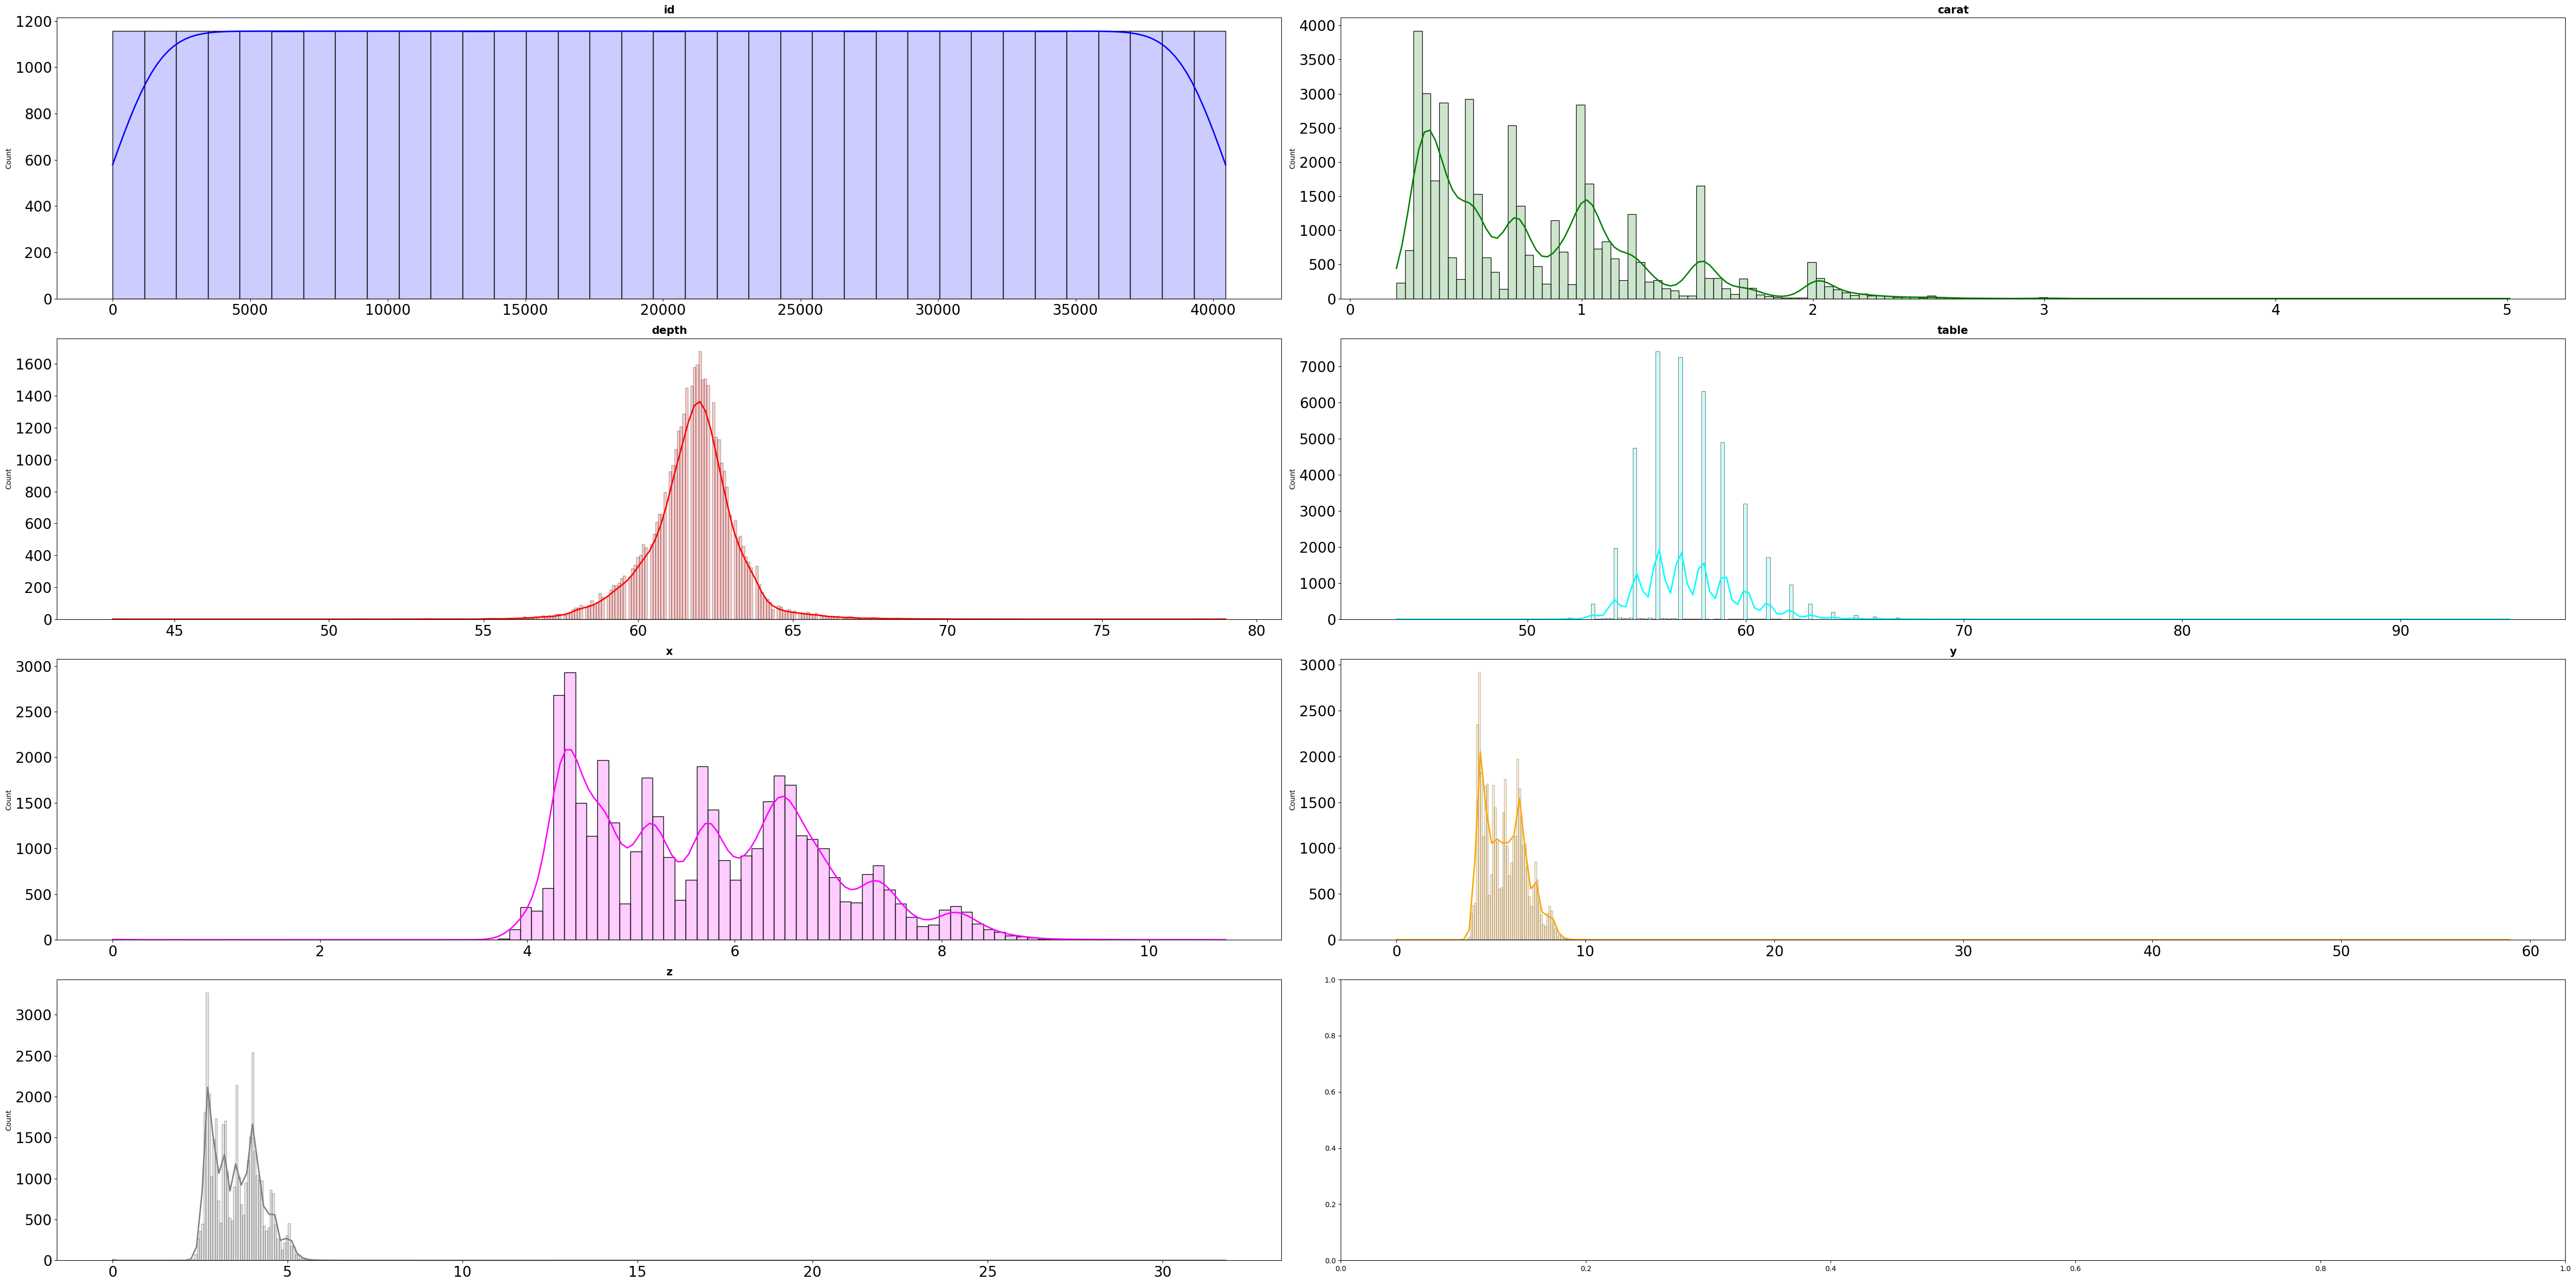

In [746]:
# Gráfico de distribución para cada variable numérica del train
# ==============================================================================

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (50, 25))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange","grey"]

axes = axes.flat

columnas_numeric = df_train.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("price")
 
for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_train,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();
    

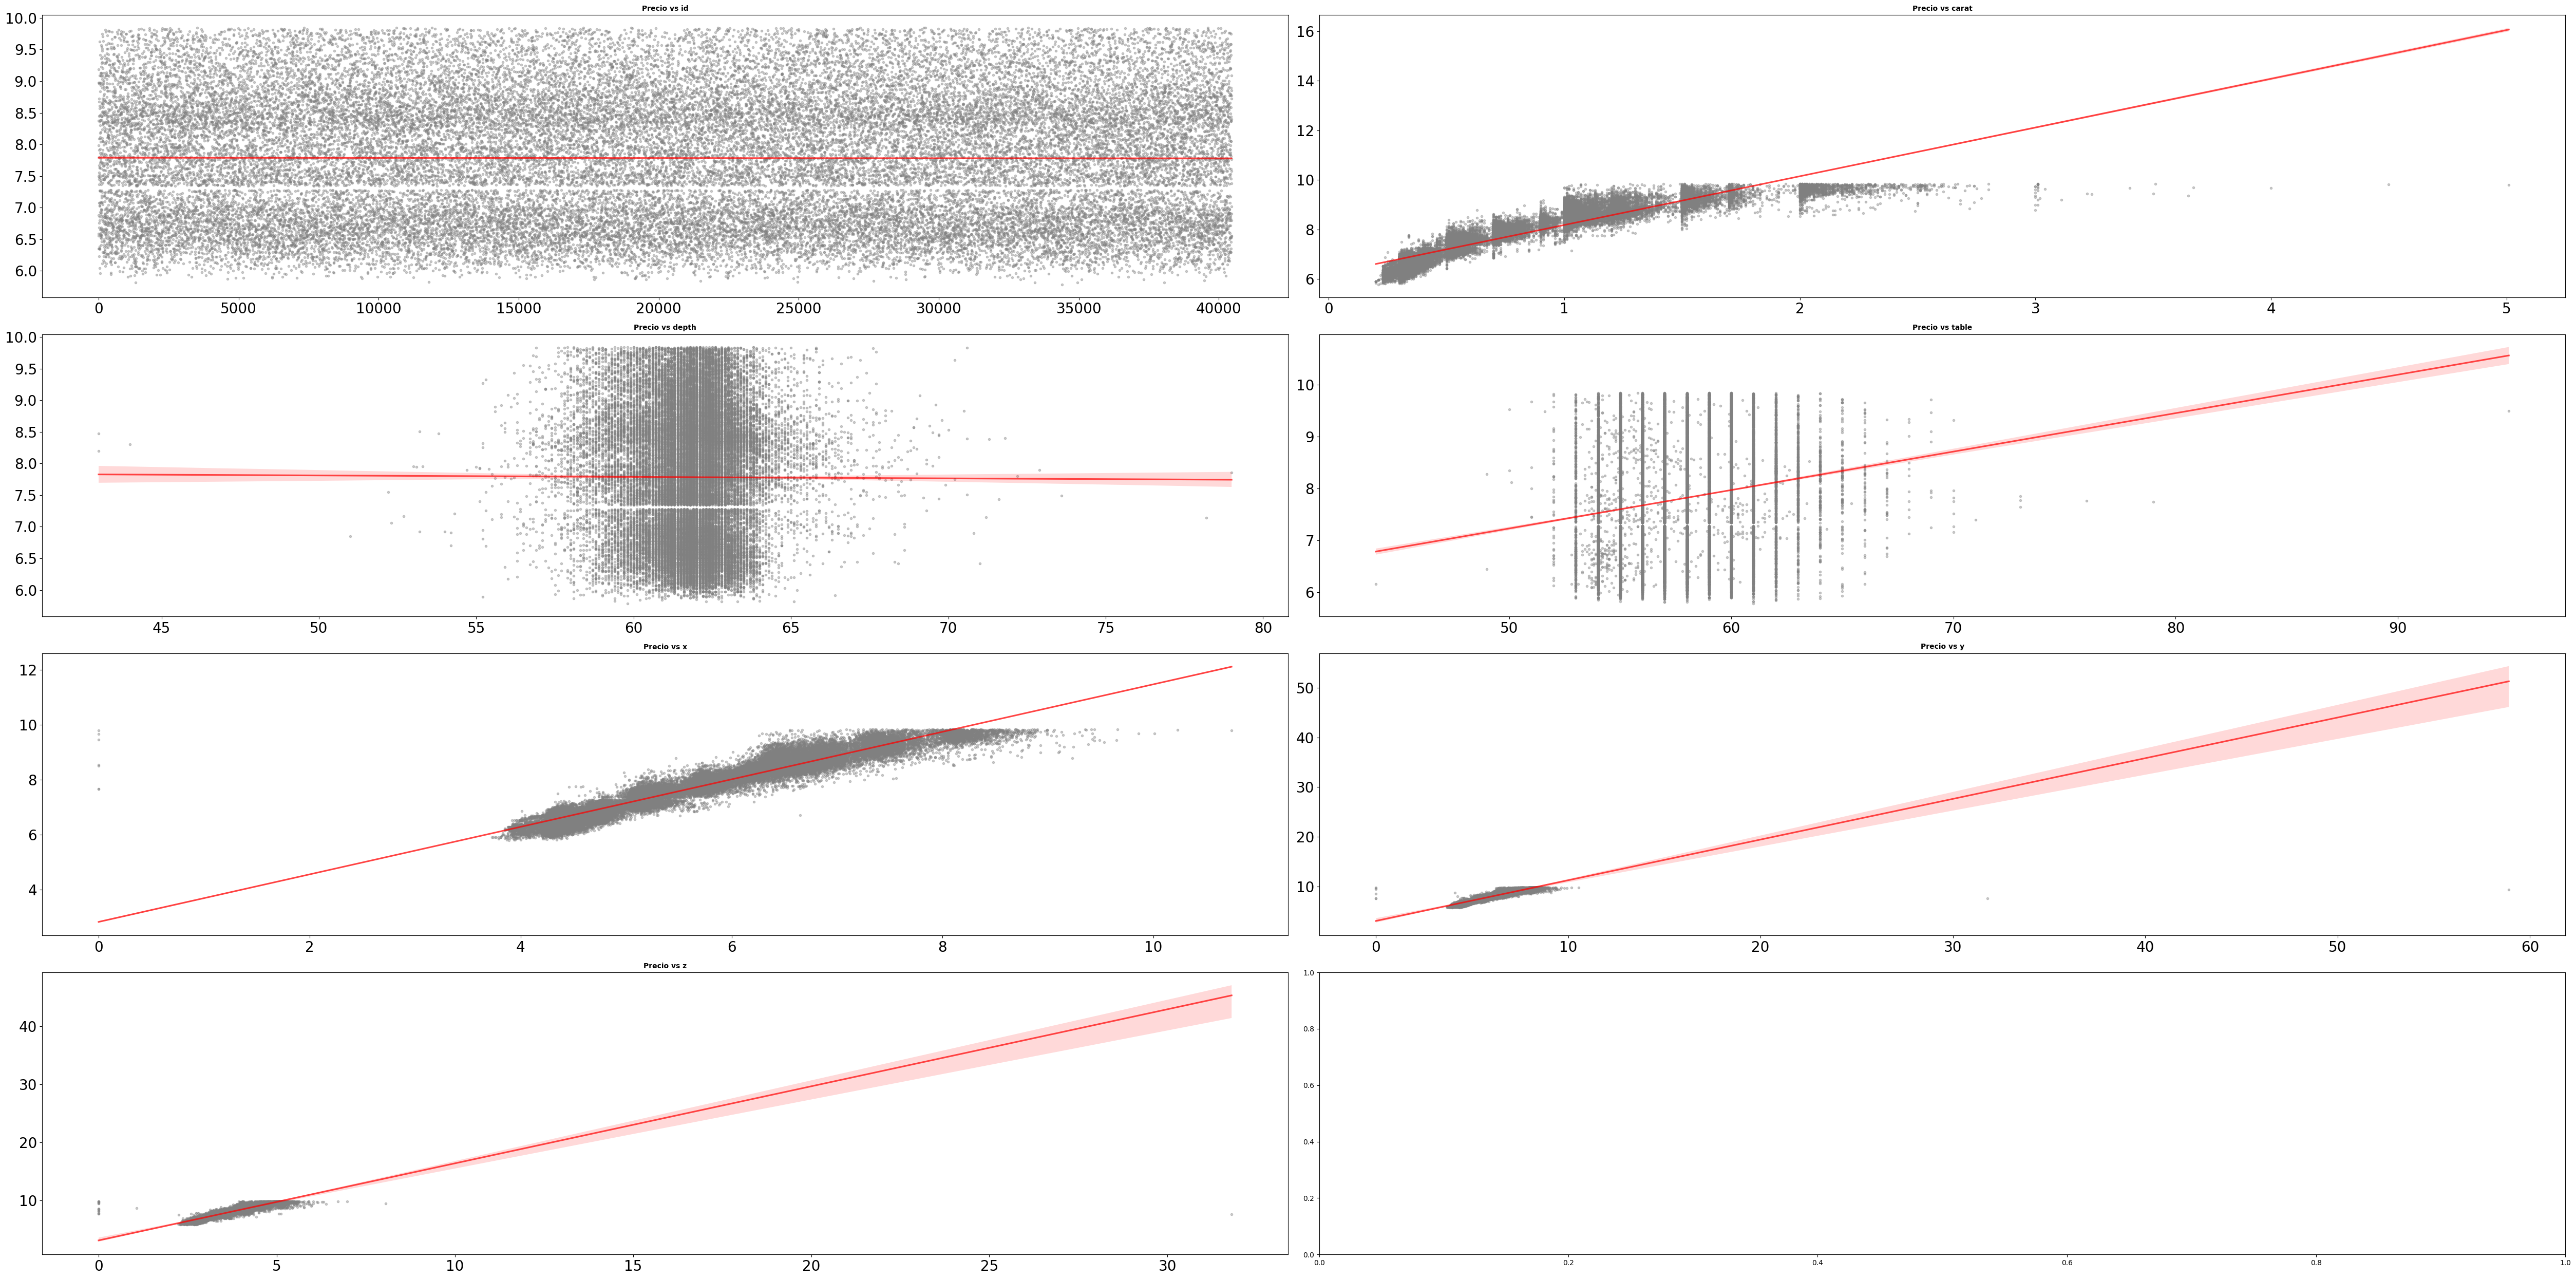

In [747]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (50, 25))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange","grey"]

axes = axes.flat

columnas_numeric = df_train.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("price")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df_train[colum], 
        y = df_train["price"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

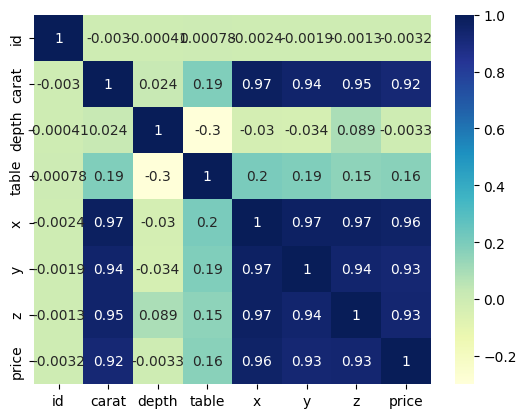

In [748]:
sns.heatmap(df_train.corr(), 
           cmap = "YlGnBu", 
           annot = True);

In [749]:
"""
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Initialize the dataframe using df_train.columns as the index
vif_buy_precio = pd.DataFrame(index=df_train.columns)

# Calculate and store VIF values for each feature
vif_buy_precio["VIF"] = [variance_inflation_factor(df_train.values, i)
                         for i in range(len(df_train.columns))]

# Print the resulting dataframe
print(vif_buy_precio)
"""

'\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\n\n# Initialize the dataframe using df_train.columns as the index\nvif_buy_precio = pd.DataFrame(index=df_train.columns)\n\n# Calculate and store VIF values for each feature\nvif_buy_precio["VIF"] = [variance_inflation_factor(df_train.values, i)\n                         for i in range(len(df_train.columns))]\n\n# Print the resulting dataframe\nprint(vif_buy_precio)\n'

In [750]:
df_train.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [ ]:
"""import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cargar los datos
data = df_train

# Calcular el VIF para cada variable independiente
vif = pd.DataFrame()
vif["Variable"] = data.columns
vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]

# Imprimir los resultados
print(vif)"""


In [752]:
df_train_cat= df_train.select_dtypes(include="object")
df_train_cat["price"] = df_train["price"]
df_train_cat.head()

cut color clarity  price
0    Premium     D     SI2  6.353
1      Ideal     E    VVS2  9.183
2      Ideal     F     VS2  7.983
3  Very Good     G     SI2  8.371
4    Premium     G     VS1  6.588

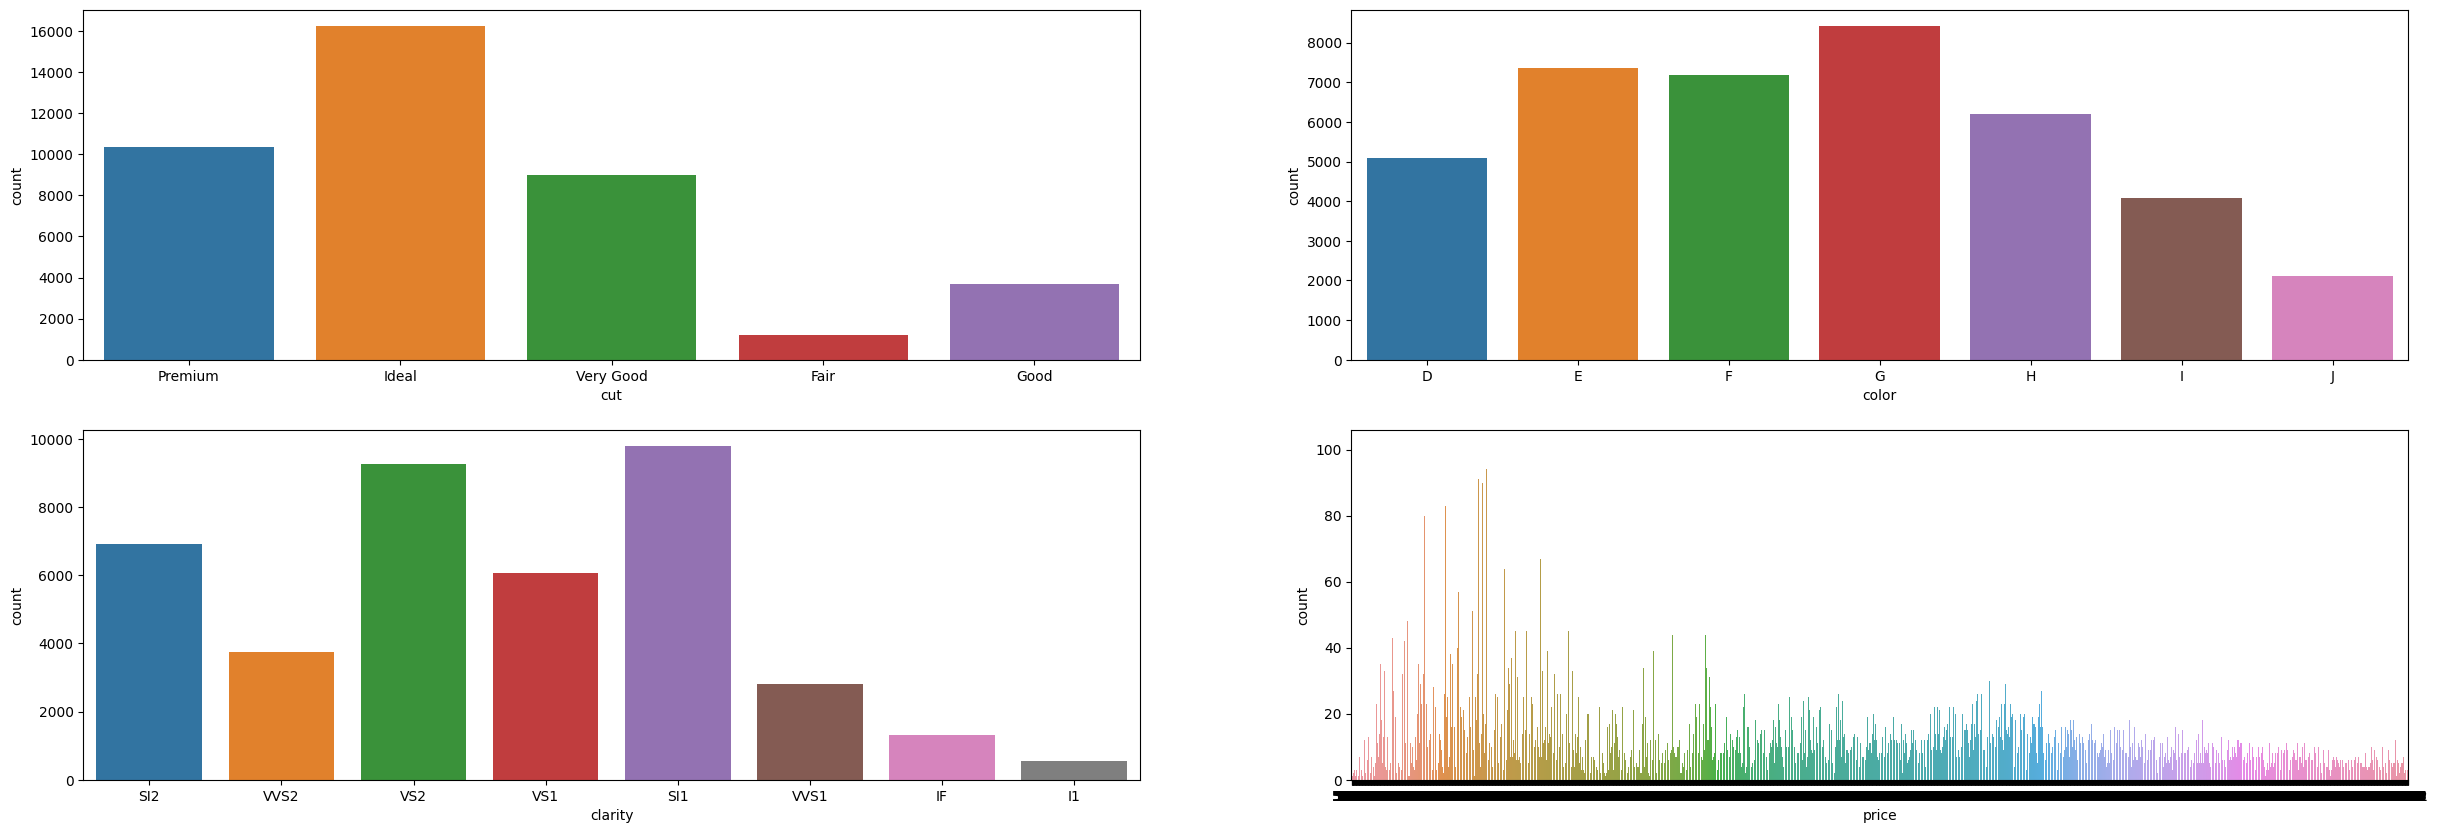

In [753]:
fig, axes = plt.subplots(nrows =2,ncols = 2, figsize = (30,10))
axes = axes.flat
for i , columns in enumerate(df_train_cat.columns):
    sns.countplot(data = df_train_cat,
                  x = columns,
                  ax = axes[i]);

In [754]:
df_corte =  df_train_cat.groupby("cut")["price"].median().reset_index()
df_corte

cut   price
0       Fair  8.0945
1       Good  7.9935
2      Ideal  7.4900
3    Premium  8.0720
4  Very Good  7.8680

In [755]:
"""sns.barplot(data = df_corte,
                x = "color",
                y= "price");"""

'sns.barplot(data = df_corte,\n                x = "color",\n                y= "price");'

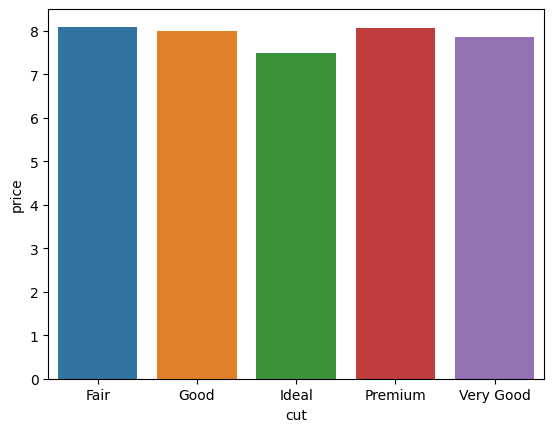

In [756]:
sns.barplot(data = df_corte,
                x = "cut",
                y= "price");

# PRUEBA

Al tener "carat" una correlacion muy grande con "price",  y ser ademas un resultado de un cálculo que sus variables son "x","y","z", se prrueba a hacer un modelo solo con carat y precio

In [757]:
prueba_test = df_test["carat"]
prueba_test = pd.DataFrame(prueba_test)
prueba_test.head()

carat
0   0.32
1   1.24
2   1.66
3   0.75
4   1.50

In [758]:

prueba_train = df_train[["price", "carat"]]
prueba_train.head()

price  carat
0  6.353   0.30
1  9.183   1.01
2  7.983   0.72
3  8.371   1.08
4  6.588   0.36

In [759]:
stats.shapiro(prueba_train["price"])
#Menor a 0.05, asique es aceptable

ShapiroResult(statistic=0.9629329442977905, pvalue=0.0)

#### Vamos a aplicarle a nuestra variable la normalizacion "normal o manual"


In [760]:
# vamos a crear distintas variables con los estadísticos que necesitamos

media = prueba_train["price"].mean()
maximo = prueba_train["price"].max() 
minimo = prueba_train["price"].min()

In [761]:
prueba_train["price_MANUAL"] = (prueba_train["price"] - media) / (maximo - minimo )

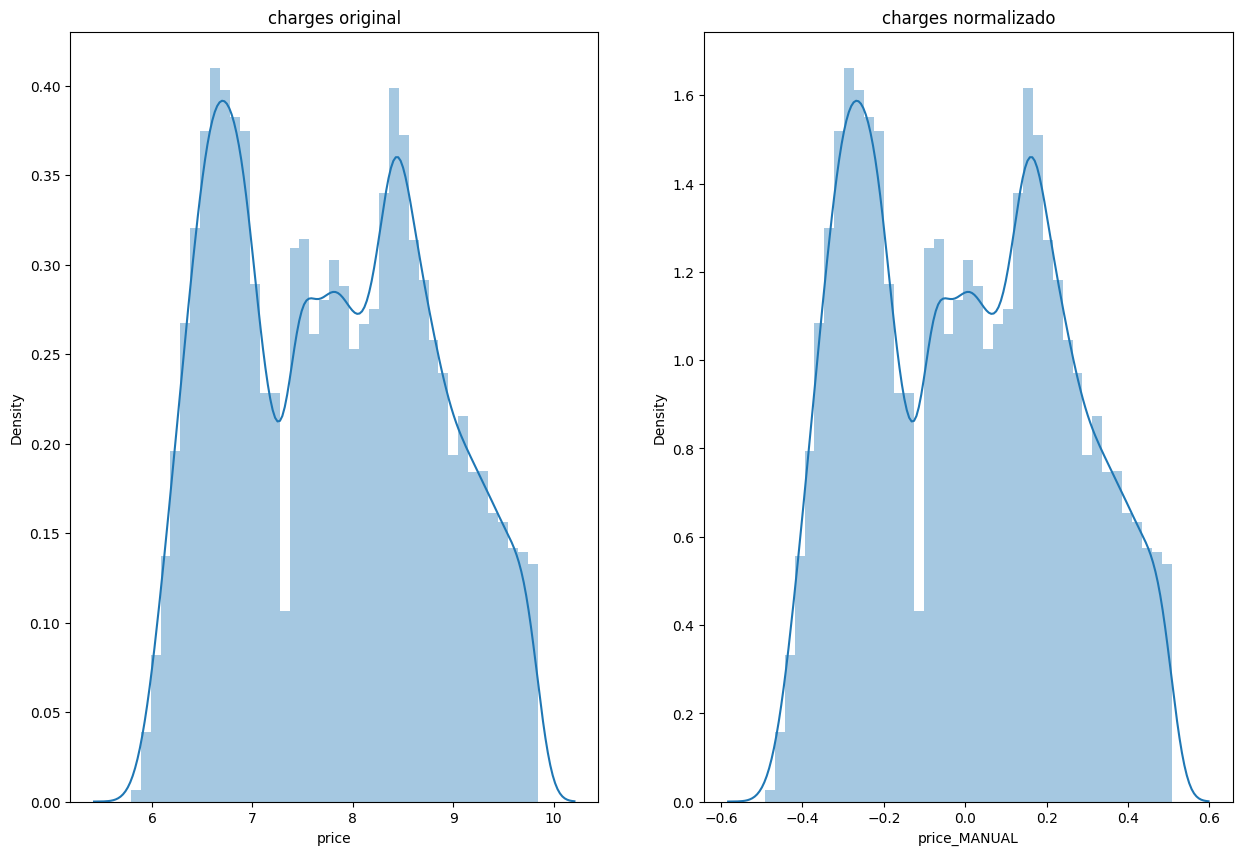

In [762]:
fig, axes = plt.subplots(1, 2, figsize = (15,10))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado')

sns.distplot(prueba_train["price"] ,ax = axes[0])
sns.distplot(prueba_train["price_MANUAL"], ax = axes[1]);

no cambia nada.

In [763]:
stats.shapiro(prueba_train["price_MANUAL"]) # es el mismo pvalor, no cambia

ShapiroResult(statistic=0.9629329442977905, pvalue=0.0)

In [764]:
prueba_train['price_LOG'] = prueba_train['price'].apply(lambda x: np.log(x))
prueba_train.head()

price  carat  price_MANUAL  price_LOG
0  6.353   0.30     -0.352854   1.848927
1  9.183   1.01      0.345050   2.217354
2  7.983   0.72      0.049119   2.077314
3  8.371   1.08      0.144803   2.124773
4  6.588   0.36     -0.294901   1.885250

In [765]:
stats.shapiro(prueba_train["price_LOG"]) # es el mismo pvalor, no cambia

ShapiroResult(statistic=0.9636465311050415, pvalue=0.0)

#### metodo Sklearn MinMaxScaller

In [766]:
#se usa la df de prueba original, con 2 columnas
prueba_test = df_test["carat"]
prueba_test = pd.DataFrame(prueba_test)
prueba_train = df_train[["price", "carat"]]


In [767]:
# construir el modelo de escalador
minmax = MinMaxScaler()

In [768]:
# ajustamos el modelo utilizando nuestro set de datos , ***DOBLE CORCHETE
minmax.fit(prueba_train[["price"]])

MinMaxScaler()

In [769]:
# transformamos los datos
X_normalizadas = minmax.transform(prueba_train[["price"]])

In [770]:
# Vamos a verificar los valores mínimos después de la normalización
X_normalizadas.min(axis=0)

array([0.])

In [771]:
# y los máximos?
X_normalizadas.max(axis=0)

array([1.])

In [772]:
# lo unimos a nuestro dataframe original
prueba_train['price_NORM'] = X_normalizadas

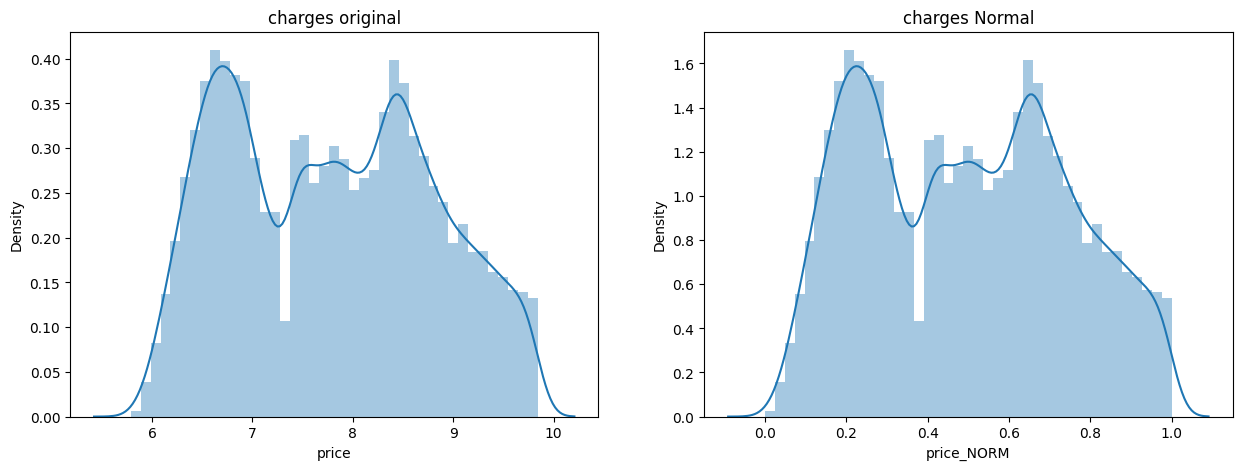

In [773]:

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges Normal')

sns.distplot(prueba_train['price'],ax = axes[0])
sns.distplot(prueba_train['price_NORM'], ax = axes[1]);

In [774]:
sp.norma_minmaxscaller(prueba_train, "price")

price  carat  price_NORM
0      6.353   0.30    0.139581
1      9.183   1.01    0.837485
2      7.983   0.72    0.541554
3      8.371   1.08    0.637238
4      6.588   0.36    0.197534
...      ...    ...         ...
40450  6.551   0.42    0.188409
40451  7.382   0.53    0.393342
40452  7.768   0.80    0.488533
40453  8.726   1.01    0.724784
40454  8.771   1.30    0.735882

[40455 rows x 3 columns]

In [775]:
stats.shapiro(prueba_train["price"])

ShapiroResult(statistic=0.9629329442977905, pvalue=0.0)

estandarizacion

In [776]:
pruebra_train = prueba_train.drop("price_NORM",axis= 1, inplace = True)
lista = ["carat"]

In [777]:
 # construir el modelo de escalador
robust = RobustScaler()

In [778]:
import pickle 
#generamos el pickle de esta estandarizacion
with open (f"data/robust_carat.pkl", "wb") as estandarizacion:
    pickle.dump(robust, estandarizacion)

In [779]:
df_train_stand = sp.estandar_robustscaller(prueba_train, ["carat"],robust)

In [780]:
# Reparto de datos en train y test
# ==============================================================================
# lo primero que hacemos es definir cual es nuestra variable Y y nuestras variables X
X = df_train_stand.drop('price', axis =1)
y = df_train_stand["price"]


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)

In [781]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [782]:
"""%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();"""

'%time\nfig = plt.figure(figsize=(10, 6))\ntree.plot_tree(regressor, feature_names=X_train.columns, filled=True)\nplt.show();'

claramente esta sobreentrenado

In [783]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [784]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [785]:
df_1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
df_1.head()


MAE       MSE      RMSE        R2    set            modelo
0  0.195662  0.062186  0.249372  0.939108   test  Decission Tree I
1  0.197133  0.062990  0.250979  0.939260  train  Decission Tree I

In [786]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,6],
        "min_samples_leaf" : [10, 50, 100]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [787]:
# ajustamos el modelo de nuevo

%time
gs.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 6],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [788]:
best_tree = gs.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=7, max_features=1, min_samples_leaf=10,
                      min_samples_split=50)

In [789]:
"""# volvamos a intentar visualizar el árbol a ver como se ve: 

fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);"""

'# volvamos a intentar visualizar el árbol a ver como se ve: \n\nfig = plt.figure(figsize=(12, 6))\ntree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);'

In [790]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)
y_pred_train_dt2

array([9.23523982, 8.85034622, 9.26231183, ..., 7.80480477, 7.51253763,
       9.38433014])

In [791]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2

MAE       MSE      RMSE        R2    set            modelo
0  0.195415  0.061891  0.248778  0.939397   test  Decision tree II
1  0.197707  0.063275  0.251545  0.938986  train  Decision tree II

se limpia el set de test

In [792]:
df_test = pd.read_csv("data/test.csv")
df_test.head()

id  carat      cut color clarity  depth  table     x     y     z
0   0   0.32    Ideal     I     SI1   60.5   58.0  4.43  4.49  2.70
1   1   1.24  Premium     I     SI1   62.9   60.0  6.80  6.74  4.26
2   2   1.66  Premium     D     SI1   62.0   59.0  7.55  7.60  4.70
3   3   0.75  Premium     D     SI2   60.6   56.0  5.94  5.90  3.59
4   4   1.50     Fair     E     SI2   64.8   55.0  7.26  7.15  4.67

In [793]:
#seleccionamos la columna carat
df_test = df_test[["carat"]]
df_test


carat
0       0.32
1       1.24
2       1.66
3       0.75
4       1.50
...      ...
13480   1.10
13481   0.90
13482   0.30
13483   1.25
13484   0.81

[13485 rows x 1 columns]

In [794]:
# estandarizacion carat del train que se lo aplicamos al test
with open('data/robust_carat.pkl', 'rb') as test:
    estandar_test = pickle.load(test)
    

In [795]:
df_test_stand = pd.DataFrame(estandar_test.transform(df_test[["carat"]]), columns = ["carat"])
df_test_stand.head()

carat
0 -0.593750
1  0.843750
2  1.500000
3  0.078125
4  1.250000

In [796]:
resultado1 = pd.DataFrame(best_tree.predict(df_test_stand), columns = ["price"]).reset_index()
resultado1.rename(columns = {"index": "id"}, inplace = True)
resultado1.head()

id     price
0   0  6.553037
1   1  8.850346
2   2  9.262312
3   3  7.894090
4   4  9.186318

In [797]:
resultado1.to_csv("data/modelo1.csv", index = False)

In [798]:

# cargar el fichero con el escalador
# Aplicar ese escalador sobbre tu test. 
# haces la prediccion
# best_tree.predic(df_test)

# outliers

In [799]:

df_train.head()

id  carat        cut color clarity  depth  table     x     y     z  price
0   0   0.30    Premium     D     SI2   62.4   58.0  4.31  4.28  2.68  6.353
1   1   1.01      Ideal     E    VVS2   62.7   56.0  6.42  6.46  4.04  9.183
2   2   0.72      Ideal     F     VS2   61.8   59.0  5.71  5.74  3.54  7.983
3   3   1.08  Very Good     G     SI2   63.2   57.0  6.54  6.50  4.12  8.371
4   4   0.36    Premium     G     VS1   62.3   59.0  4.50  4.55  2.82  6.588

In [800]:
df_train_num

id  carat  depth  table     x     y     z  price
0          0   0.30   62.4   58.0  4.31  4.28  2.68  6.353
1          1   1.01   62.7   56.0  6.42  6.46  4.04  9.183
2          2   0.72   61.8   59.0  5.71  5.74  3.54  7.983
3          3   1.08   63.2   57.0  6.54  6.50  4.12  8.371
4          4   0.36   62.3   59.0  4.50  4.55  2.82  6.588
...      ...    ...    ...    ...   ...   ...   ...    ...
40450  40450   0.42   62.1   59.0  4.78  4.82  2.98  6.551
40451  40451   0.53   62.0   58.0  5.21  5.18  3.22  7.382
40452  40452   0.80   62.8   58.0  5.86  5.90  3.69  7.768
40453  40453   1.01   61.5   57.0  6.40  6.48  3.96  8.726
40454  40454   1.30   60.1   58.0  7.10  7.14  4.28  8.771

[40455 rows x 8 columns]

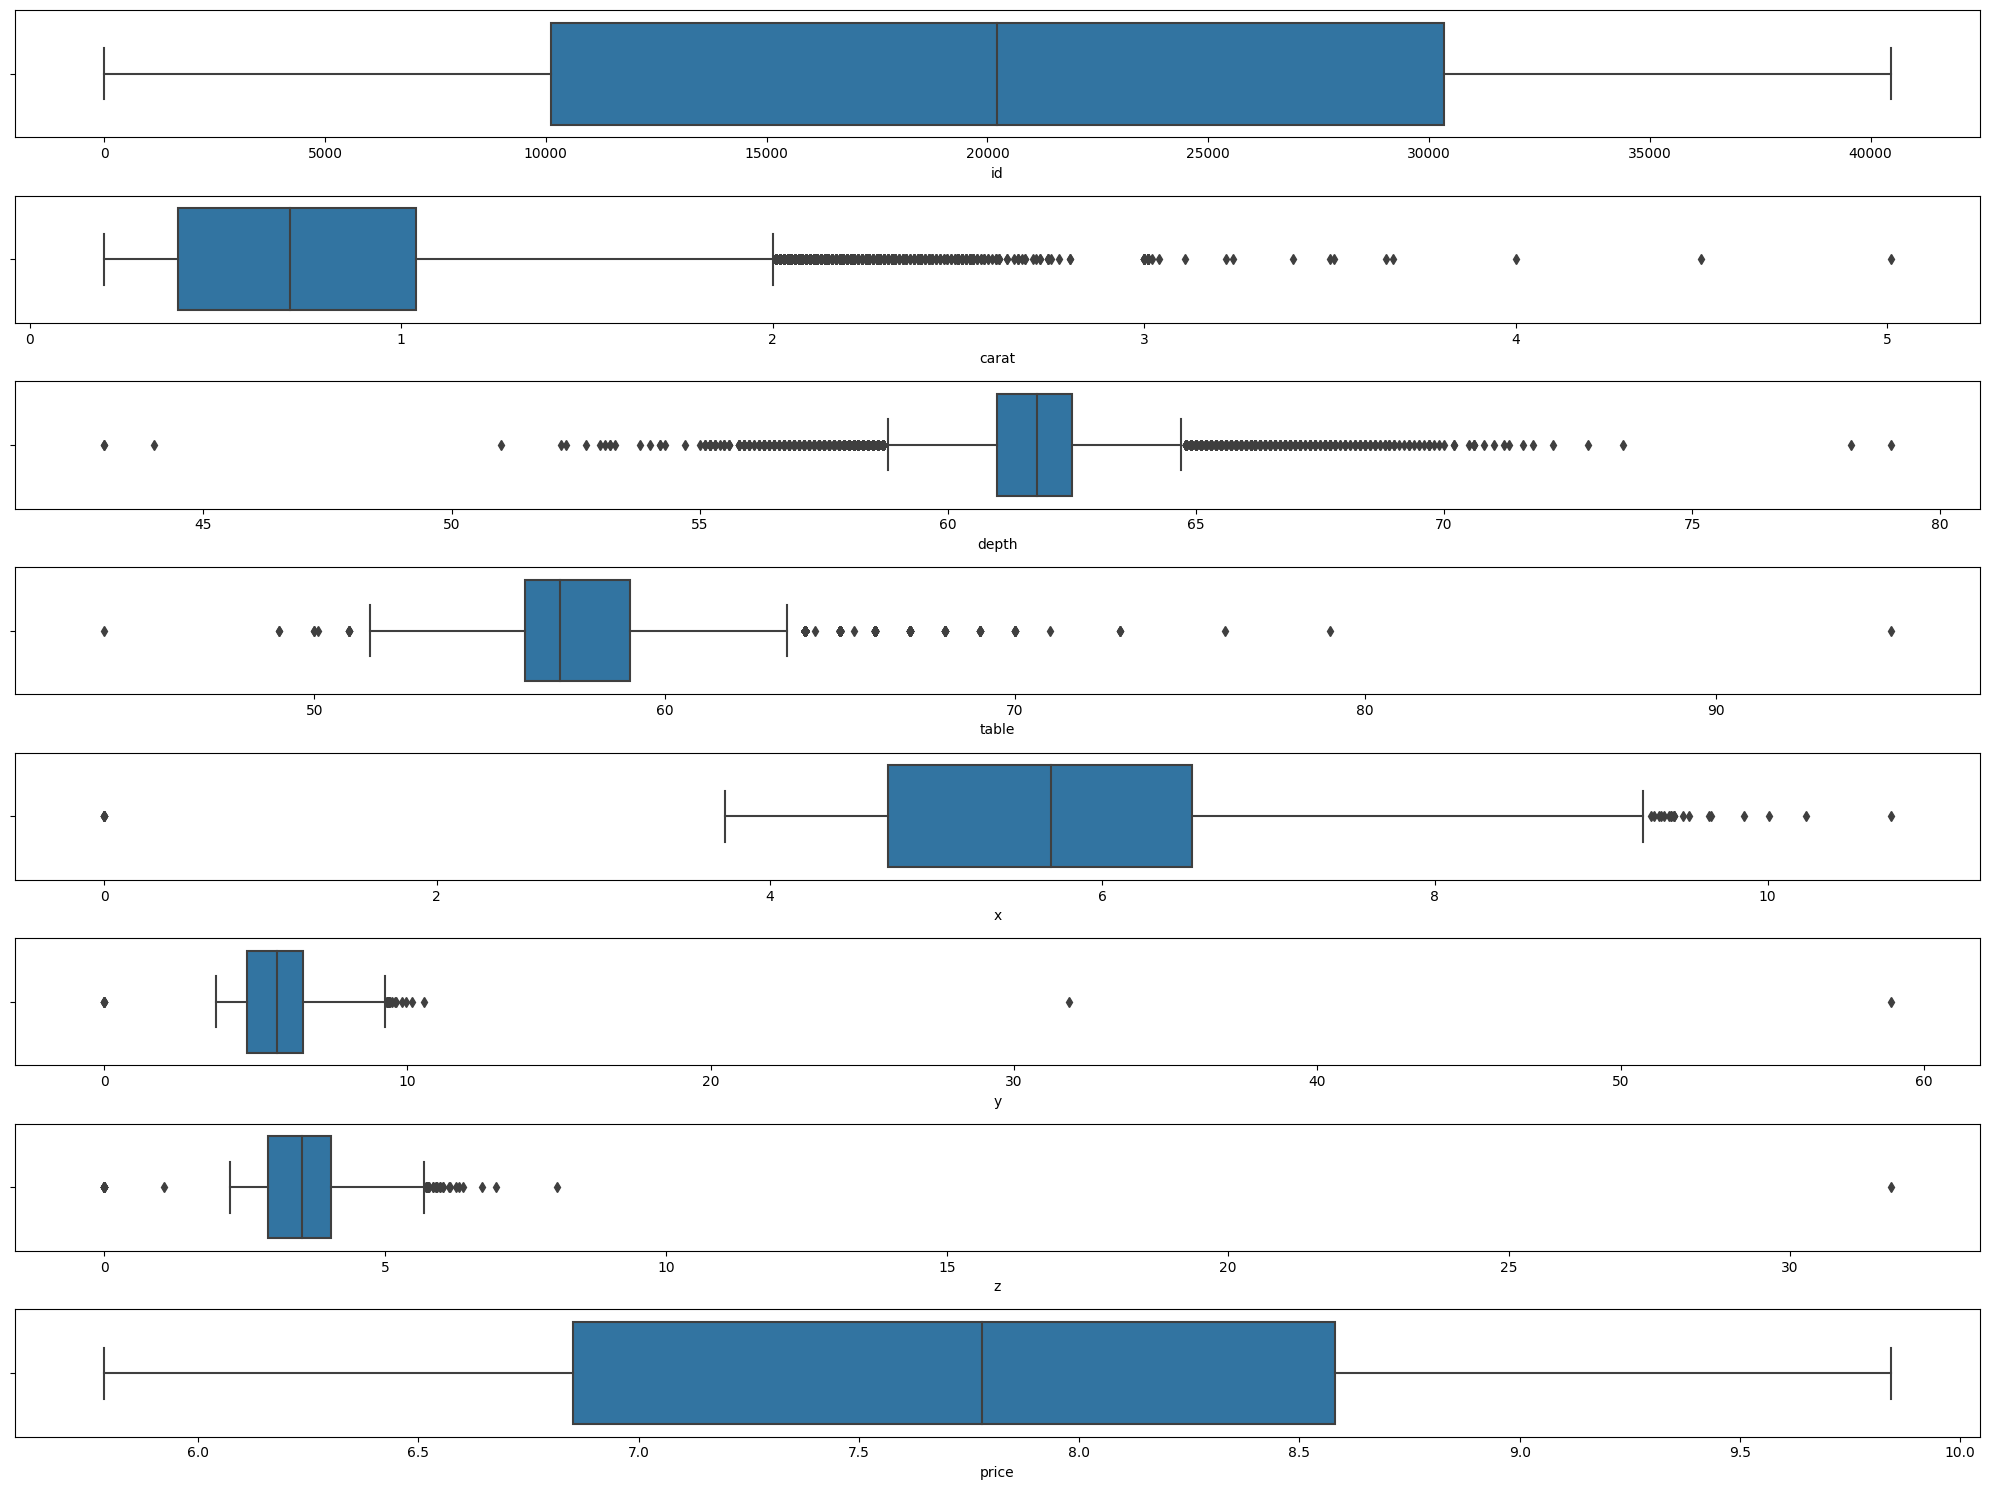

In [801]:
fig, axes = plt.subplots(nrows= 8,ncols= 1, figsize=(20,15))

for i , columna in enumerate(df_train_num.columns):
    
    sns.boxplot(data = df_train_num,
                x = columna,
                ax = axes[i])
    plt.tight_layout()

In [802]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [803]:
lista_columnas = df_train_num.columns.to_list()
lista_columnas.remove('id')

In [804]:
# aplicamos la función y sacamos los índices de los outliers.

ind = detectar_outliers(lista_columnas, df_train_num)
print(ind)

{'carat': [40, 85, 130, 173, 244, 264, 274, 289, 292, 295, 312, 346, 398, 574, 587, 662, 681, 682, 716, 725, 728, 782, 785, 798, 799, 801, 818, 928, 973, 993, 995, 1011, 1025, 1026, 1051, 1154, 1216, 1249, 1315, 1388, 1402, 1417, 1418, 1423, 1429, 1433, 1437, 1443, 1522, 1660, 1670, 1739, 1814, 1816, 1866, 1885, 1894, 1967, 1971, 1977, 1995, 2030, 2052, 2063, 2071, 2178, 2194, 2224, 2229, 2238, 2257, 2289, 2340, 2346, 2352, 2357, 2410, 2440, 2449, 2460, 2465, 2468, 2496, 2518, 2529, 2530, 2556, 2570, 2664, 2683, 2767, 2785, 2799, 2811, 2884, 2912, 2935, 2939, 2971, 2981, 3018, 3032, 3073, 3123, 3140, 3146, 3149, 3156, 3237, 3297, 3316, 3348, 3351, 3369, 3378, 3381, 3403, 3430, 3481, 3488, 3491, 3502, 3525, 3545, 3558, 3580, 3593, 3606, 3658, 3666, 3667, 3675, 3699, 3747, 3780, 3790, 3820, 3828, 3837, 3844, 3908, 4084, 4124, 4147, 4192, 4215, 4276, 4285, 4327, 4342, 4356, 4384, 4406, 4411, 4442, 4522, 4594, 4621, 4634, 4649, 4651, 4673, 4674, 4679, 4703, 4721, 4730, 4790, 4824, 4829, 48

In [805]:
ind.keys()

dict_keys(['carat', 'depth', 'table', 'x', 'y', 'z'])

he visto que hay elementos que destacan mucho en algunas columnas, en este caso 3 filas que decido eliminar y otros que sus medidas son 0 el cual se elimina tambien


In [806]:
a = df_train["id"][df_train["carat"] >= 4].to_list()
a

[6403, 7978, 32782]

In [807]:
df_train = df_train.drop(index=[6403, 7978, 32782] )


In [808]:
b = df_train["id"][df_train["y"] == 0].to_list()
b

[3185, 4057, 7910, 8820, 13711, 30214]

In [809]:
df_train = df_train.drop(index=[1249,3185,4057,4401,7910,8174,8820,10669,10881,12992,13711,19007,23431,26686,30214,31910,34815])

In [810]:
df_train.describe().T

count          mean           std     min        25%        50%  \
id     40435.0  20229.603314  11678.351899   0.000  10117.500  20231.000   
carat  40435.0      0.797001      0.474575   0.200      0.400      0.700   
depth  40435.0     61.746057      1.436401  43.000     61.000     61.800   
table  40435.0     57.451399      2.234512  44.000     56.000     57.000   
x      40435.0      5.729355      1.121820   3.730      4.710      5.690   
y      40435.0      5.732948      1.151879   3.680      4.720      5.700   
z      40435.0      3.538605      0.706950   1.070      2.910      3.520   
price  40435.0      7.783224      1.016560   5.787      6.851      7.779   

            75%        max  
id     30342.50  40454.000  
carat      1.04      3.670  
depth     62.50     79.000  
table     59.00     95.000  
x          6.54      9.860  
y          6.54     58.900  
z          4.03     31.800  
price      8.58      9.842

In [811]:
df_train_num =  df_train.select_dtypes(include=np.number)
df_train_num =df_train_num.drop("id",axis =1)
df_train_num

carat  depth  table     x     y     z  price
0       0.30   62.4   58.0  4.31  4.28  2.68  6.353
1       1.01   62.7   56.0  6.42  6.46  4.04  9.183
2       0.72   61.8   59.0  5.71  5.74  3.54  7.983
3       1.08   63.2   57.0  6.54  6.50  4.12  8.371
4       0.36   62.3   59.0  4.50  4.55  2.82  6.588
...      ...    ...    ...   ...   ...   ...    ...
40450   0.42   62.1   59.0  4.78  4.82  2.98  6.551
40451   0.53   62.0   58.0  5.21  5.18  3.22  7.382
40452   0.80   62.8   58.0  5.86  5.90  3.69  7.768
40453   1.01   61.5   57.0  6.40  6.48  3.96  8.726
40454   1.30   60.1   58.0  7.10  7.14  4.28  8.771

[40435 rows x 7 columns]

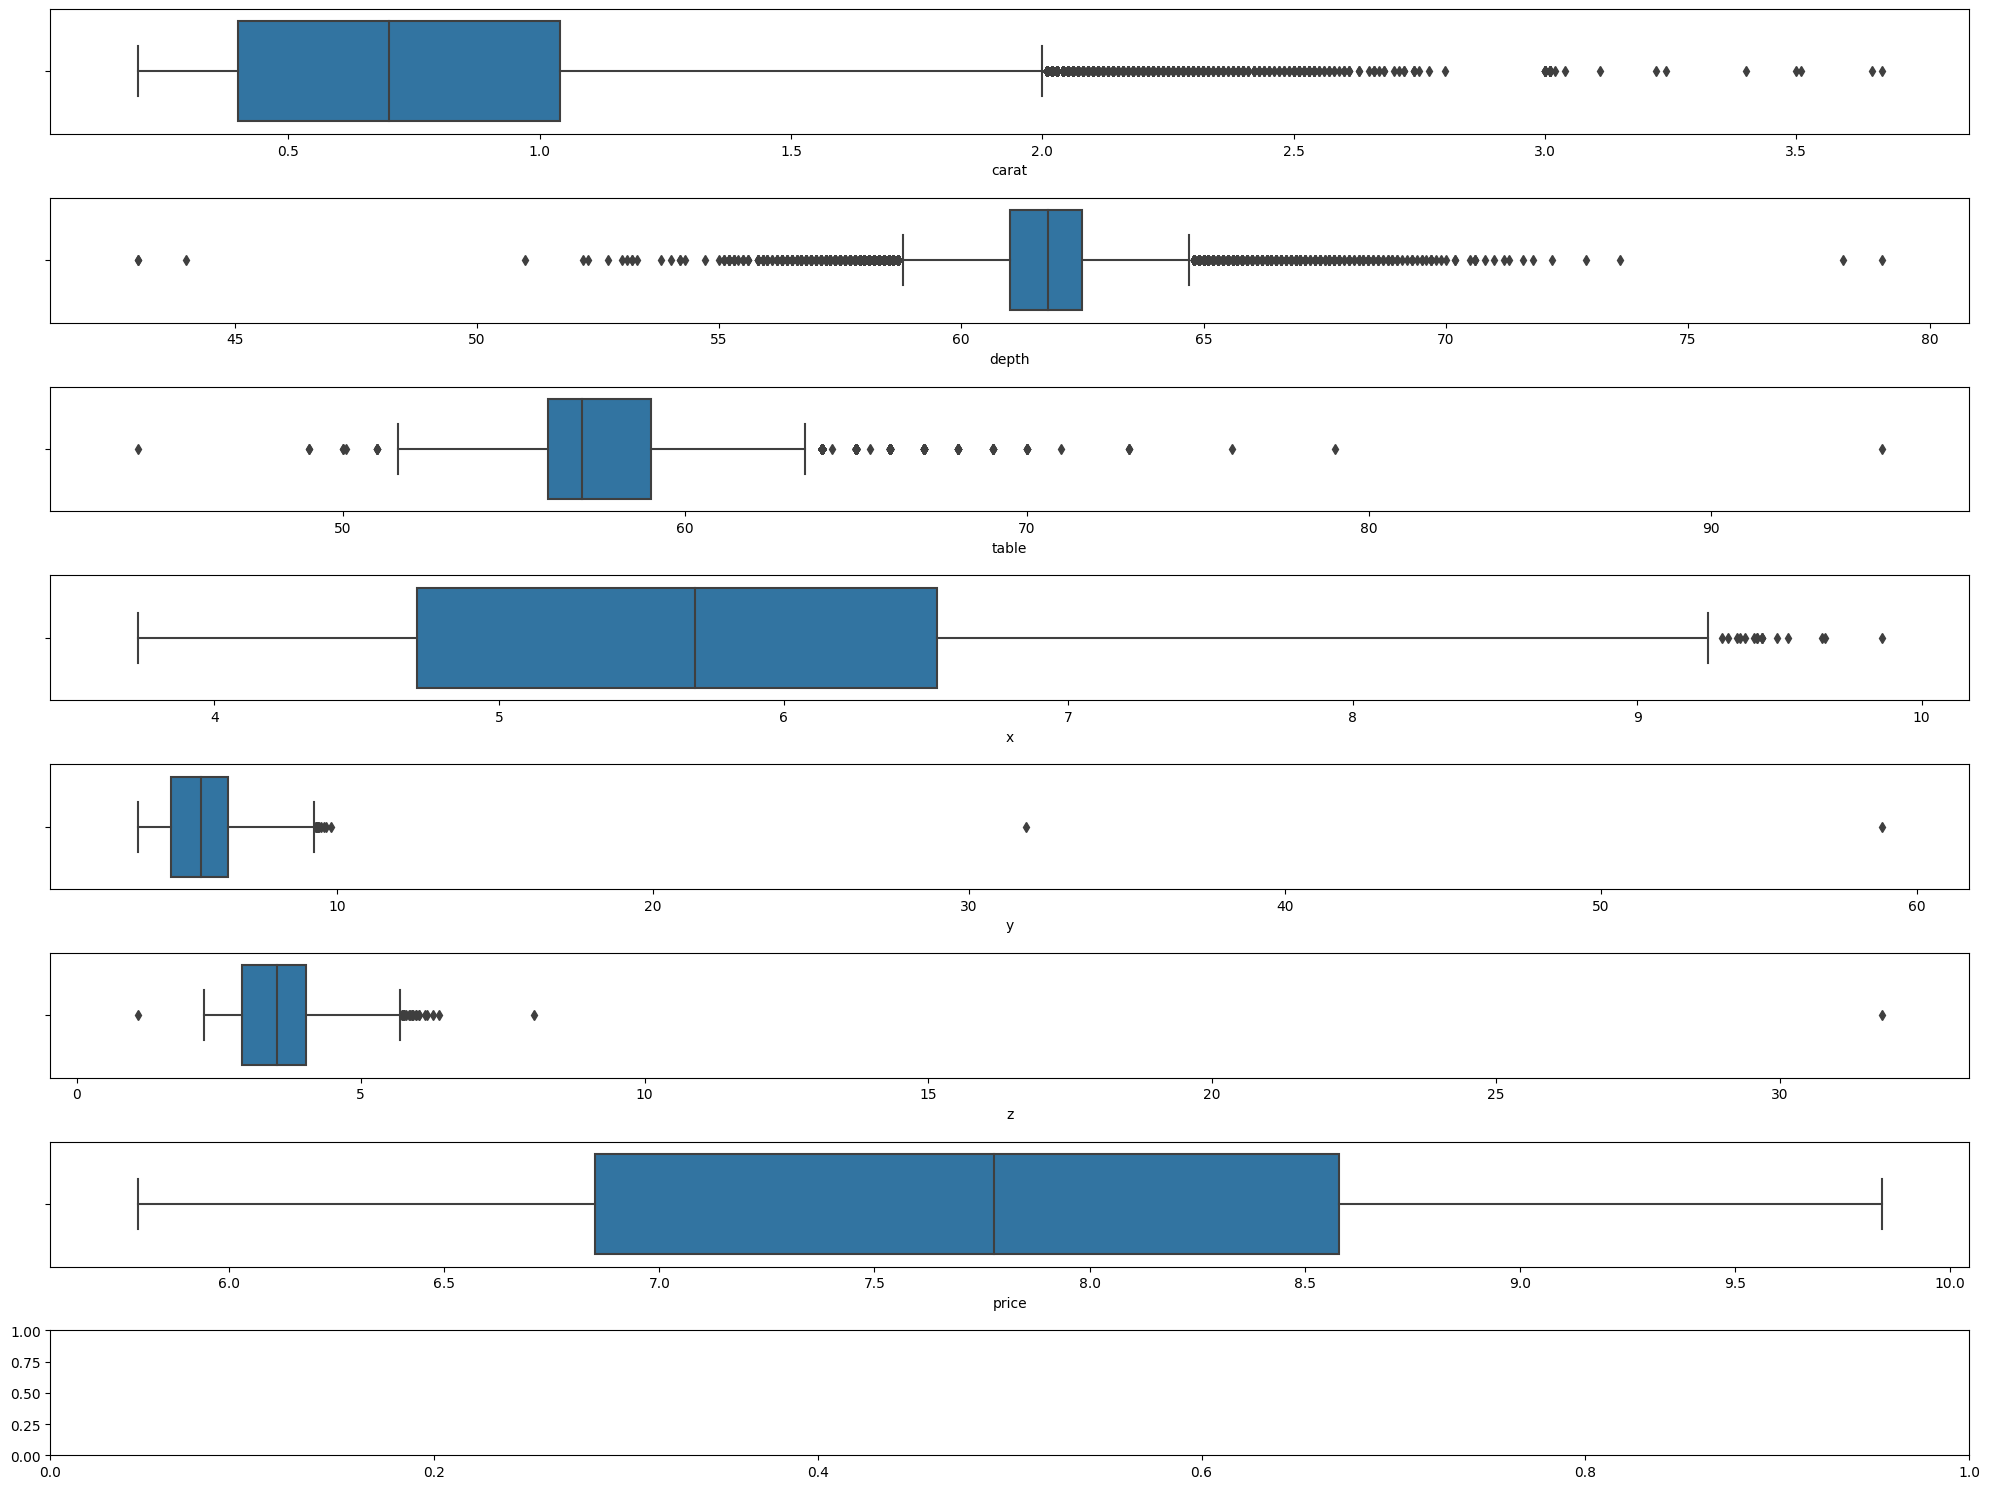

In [812]:
fig, axes = plt.subplots(nrows= 8,ncols= 1, figsize=(20,15))

for i , columna in enumerate(df_train_num.columns):
    
    sns.boxplot(data = df_train_num,
                x = columna,
                ax = axes[i])
    plt.tight_layout()

hacemos un df manteniendo los outliers

In [813]:
df_conoutliers =df_train.copy()


y otro quitandolos

In [814]:
df_sinoutliers = df_train.copy()
df_sinoutliers.head()

id  carat        cut color clarity  depth  table     x     y     z  price
0   0   0.30    Premium     D     SI2   62.4   58.0  4.31  4.28  2.68  6.353
1   1   1.01      Ideal     E    VVS2   62.7   56.0  6.42  6.46  4.04  9.183
2   2   0.72      Ideal     F     VS2   61.8   59.0  5.71  5.74  3.54  7.983
3   3   1.08  Very Good     G     SI2   63.2   57.0  6.54  6.50  4.12  8.371
4   4   0.36    Premium     G     VS1   62.3   59.0  4.50  4.55  2.82  6.588

In [815]:
df_sinoutliers_num =df_sinoutliers.select_dtypes(include=np.number)
df_sinoutliers_num = df_sinoutliers_num.drop("id",axis=1)
lista_columnas = df_sinoutliers_num.columns.to_list()

In [816]:
ind = detectar_outliers(lista_columnas, df_sinoutliers_num)
print(ind)

{'carat': [40, 85, 130, 173, 244, 264, 274, 289, 292, 295, 312, 346, 398, 574, 587, 662, 681, 682, 716, 725, 728, 782, 785, 798, 799, 801, 818, 928, 973, 993, 995, 1011, 1025, 1026, 1051, 1154, 1216, 1315, 1388, 1402, 1417, 1418, 1423, 1429, 1433, 1437, 1443, 1522, 1660, 1670, 1739, 1814, 1816, 1866, 1885, 1894, 1967, 1971, 1977, 1995, 2030, 2052, 2063, 2071, 2178, 2194, 2224, 2229, 2238, 2257, 2289, 2340, 2346, 2352, 2357, 2410, 2440, 2449, 2460, 2465, 2468, 2496, 2518, 2529, 2530, 2556, 2570, 2664, 2683, 2767, 2785, 2799, 2811, 2884, 2912, 2935, 2939, 2971, 2981, 3018, 3032, 3073, 3123, 3140, 3146, 3149, 3156, 3237, 3297, 3316, 3348, 3351, 3369, 3378, 3381, 3403, 3430, 3481, 3488, 3491, 3502, 3525, 3545, 3558, 3580, 3593, 3606, 3658, 3666, 3667, 3675, 3699, 3747, 3780, 3790, 3820, 3828, 3837, 3844, 3908, 4084, 4124, 4147, 4192, 4215, 4276, 4285, 4327, 4342, 4356, 4384, 4406, 4411, 4442, 4522, 4594, 4621, 4634, 4649, 4651, 4673, 4674, 4679, 4703, 4721, 4730, 4790, 4824, 4829, 4847, 49

In [817]:
for key, value in ind.items():
    for i in value:
        df_sinoutliers.loc[i, key] = np.nan

In [818]:
df_sinoutliers.isnull().sum()

id            0
carat      1441
cut           0
color         0
clarity       0
depth      1904
table       448
x            16
y            14
z            24
price         0
dtype: int64

vamos a sustituir los valores nulos con iterative imputer

In [819]:
# creamos una instancia del método Iterative Imputer con las características que queremos 
imputer = IterativeImputer()

In [820]:
# lo aplicamos sobre nuestras variables numéricas. 
imputer.fit(df_sinoutliers_num)

IterativeImputer()

In [821]:
# transformamos nuestros datos, para que se reemplacen los valores nulos usando "transform". 
## ⚠️ Esto nos va a devolver un array!

imputer.transform(df_sinoutliers_num)

array([[ 0.3  , 62.4  , 58.   , ...,  4.28 ,  2.68 ,  6.353],
       [ 1.01 , 62.7  , 56.   , ...,  6.46 ,  4.04 ,  9.183],
       [ 0.72 , 61.8  , 59.   , ...,  5.74 ,  3.54 ,  7.983],
       ...,
       [ 0.8  , 62.8  , 58.   , ...,  5.9  ,  3.69 ,  7.768],
       [ 1.01 , 61.5  , 57.   , ...,  6.48 ,  3.96 ,  8.726],
       [ 1.3  , 60.1  , 58.   , ...,  7.14 ,  4.28 ,  8.771]])

In [822]:
# convertimos el array que nos devuelve en un dataframe
#ademas se le cambia el nombre a la columna, ya que el nuvo df viene sin los nombres
#es importante hacer un reset index, porque al trabajar con los vecinos, si no estan ordenados generara mas nulos.

sinoutlier_trans = pd.DataFrame(imputer.transform(df_sinoutliers_num), columns = df_sinoutliers_num.columns)
sinoutlier_trans.head()

carat  depth  table     x     y     z  price
0   0.30   62.4   58.0  4.31  4.28  2.68  6.353
1   1.01   62.7   56.0  6.42  6.46  4.04  9.183
2   0.72   61.8   59.0  5.71  5.74  3.54  7.983
3   1.08   63.2   57.0  6.54  6.50  4.12  8.371
4   0.36   62.3   59.0  4.50  4.55  2.82  6.588

In [823]:
df_sinoutliers_num.isnull().sum()

carat    0
depth    0
table    0
x        0
y        0
z        0
price    0
dtype: int64

In [824]:
columnas = df_sinoutliers_num.columns
columnas

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [825]:
df_sinoutliers.drop(columnas, axis = 1, inplace = True)
df_sinoutliers.head()

id        cut color clarity
0   0    Premium     D     SI2
1   1      Ideal     E    VVS2
2   2      Ideal     F     VS2
3   3  Very Good     G     SI2
4   4    Premium     G     VS1

In [826]:
df_sinoutliers[columnas] = sinoutlier_trans
df_sinoutliers.describe().T

count          mean           std     min        25%        50%  \
id     40435.0  20229.603314  11678.351899   0.000  10117.500  20231.000   
carat  40415.0      0.797052      0.474594   0.200      0.400      0.700   
depth  40415.0     61.746339      1.436462  43.000     61.000     61.800   
table  40415.0     57.451352      2.234485  44.000     56.000     57.000   
x      40415.0      5.729470      1.121837   3.730      4.710      5.690   
y      40415.0      5.733064      1.151903   3.680      4.720      5.700   
z      40415.0      3.538693      0.706963   1.070      2.910      3.520   
price  40415.0      7.783321      1.016591   5.787      6.851      7.779   

            75%        max  
id     30342.50  40454.000  
carat      1.04      3.670  
depth     62.50     79.000  
table     59.00     95.000  
x          6.54      9.860  
y          6.54     58.900  
z          4.03     31.800  
price      8.58      9.842

In [827]:
df_train.describe().T

count          mean           std     min        25%        50%  \
id     40435.0  20229.603314  11678.351899   0.000  10117.500  20231.000   
carat  40435.0      0.797001      0.474575   0.200      0.400      0.700   
depth  40435.0     61.746057      1.436401  43.000     61.000     61.800   
table  40435.0     57.451399      2.234512  44.000     56.000     57.000   
x      40435.0      5.729355      1.121820   3.730      4.710      5.690   
y      40435.0      5.732948      1.151879   3.680      4.720      5.700   
z      40435.0      3.538605      0.706950   1.070      2.910      3.520   
price  40435.0      7.783224      1.016560   5.787      6.851      7.779   

            75%        max  
id     30342.50  40454.000  
carat      1.04      3.670  
depth     62.50     79.000  
table     59.00     95.000  
x          6.54      9.860  
y          6.54     58.900  
z          4.03     31.800  
price      8.58      9.842

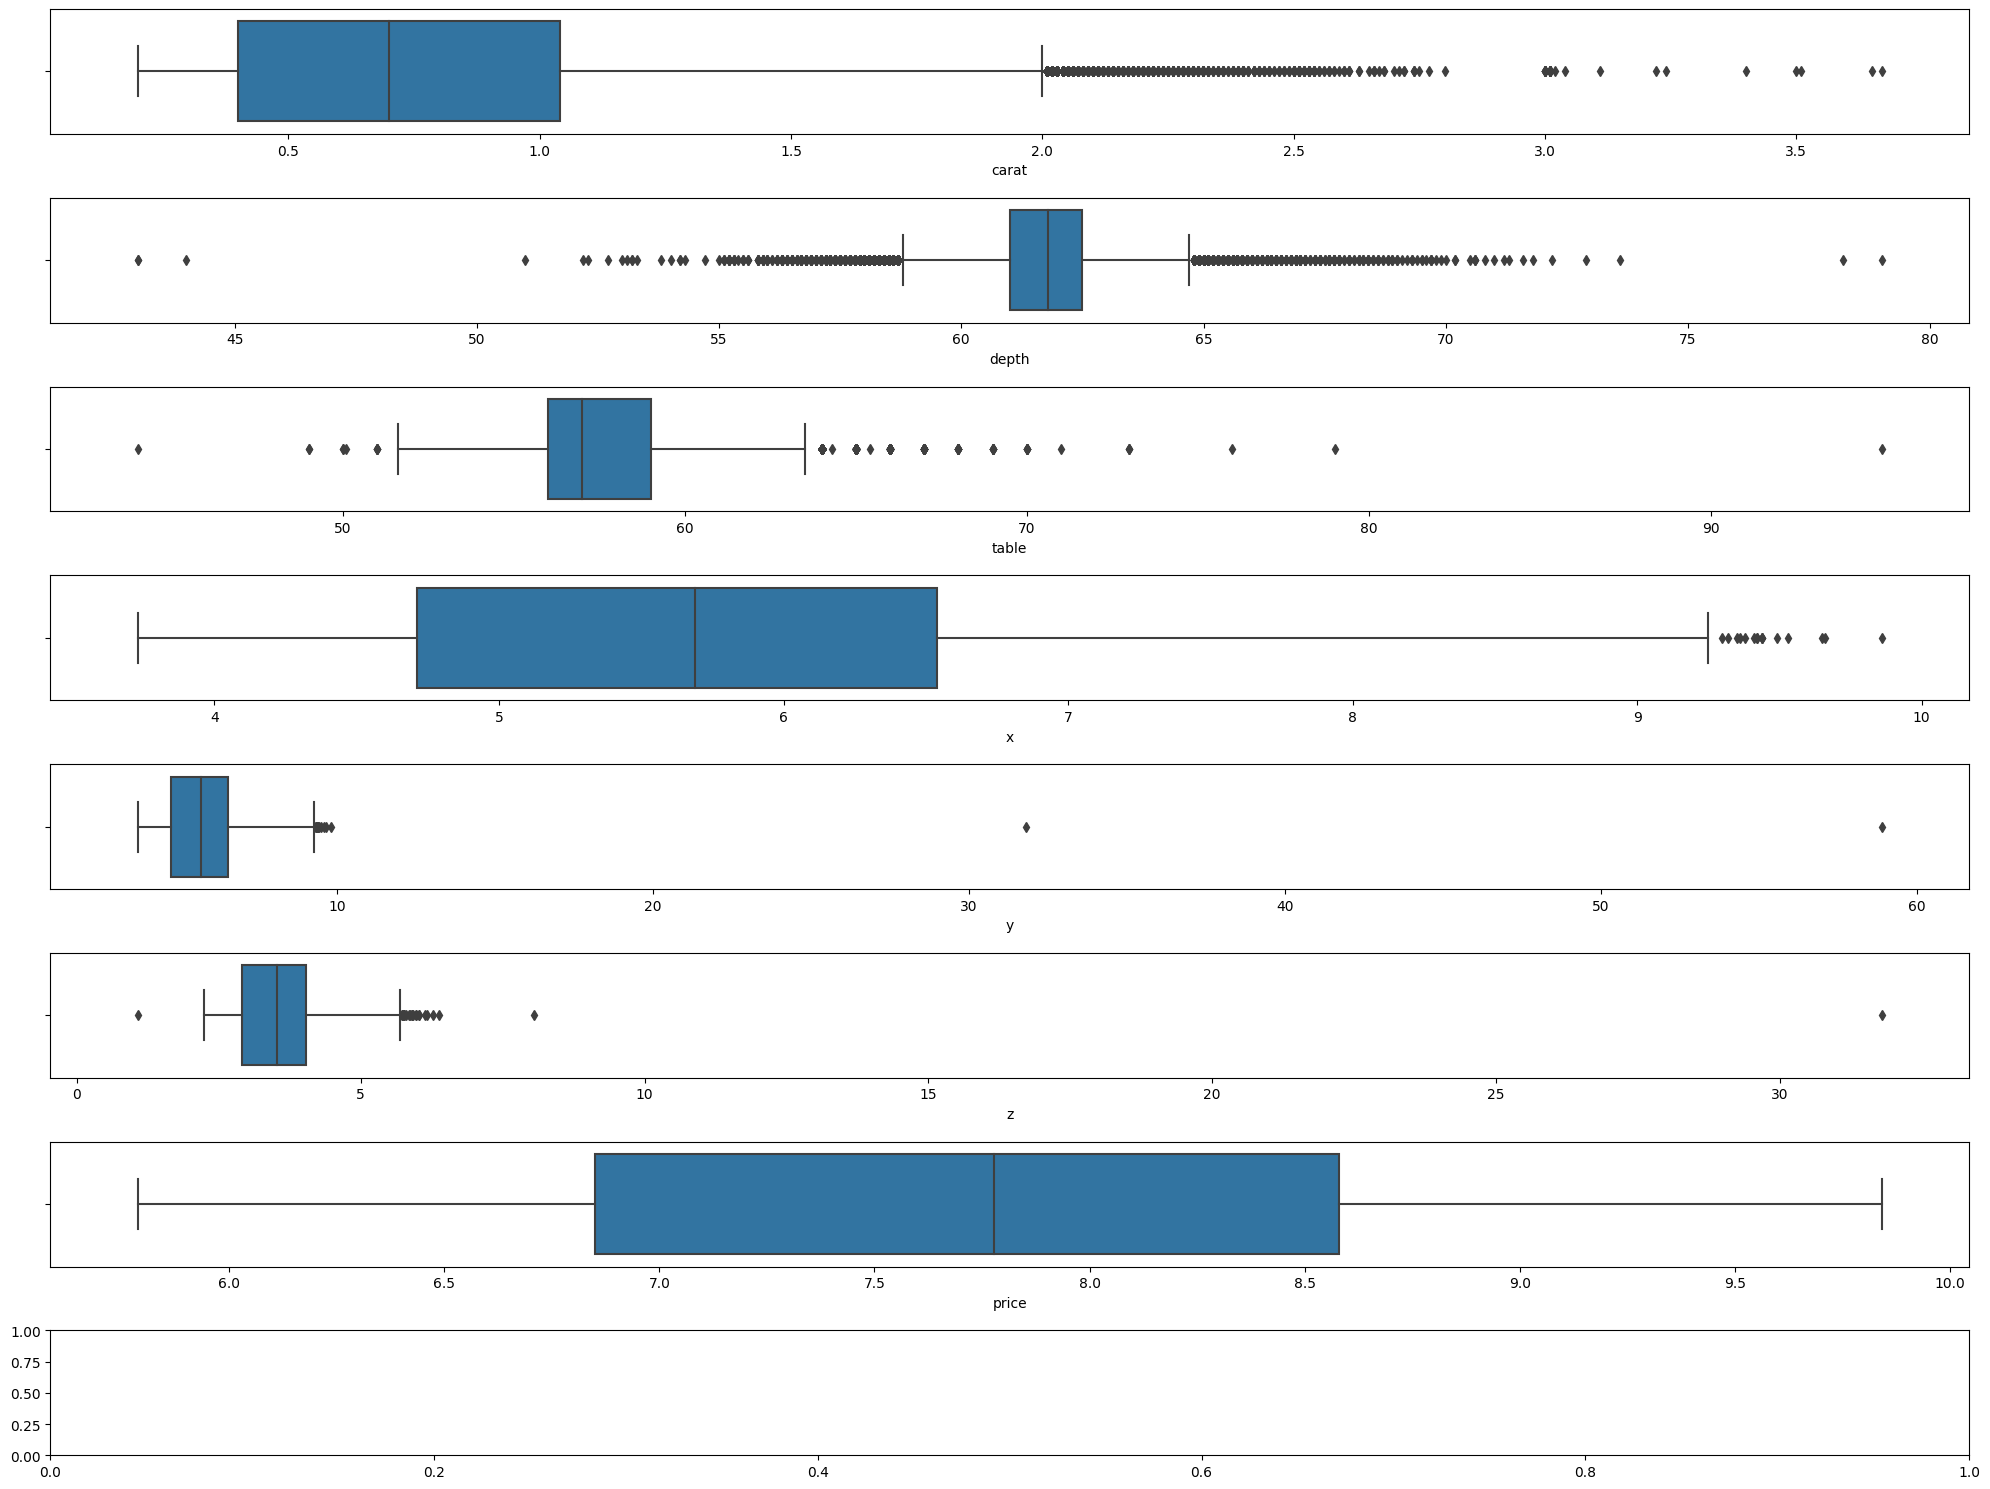

In [828]:
fig, axes = plt.subplots(nrows= 8,ncols= 1, figsize=(20,15))

for i , columna in enumerate(columnas):
    
    sns.boxplot(data = df_sinoutliers,
                x = columna,
                ax = axes[i])
    plt.tight_layout()

no se han quitado muchos outliers asque los voy a sustituir.

In [829]:
df_sinoutliers_2 = df_train.copy()
df_sinoutliers_2.head()

id  carat        cut color clarity  depth  table     x     y     z  price
0   0   0.30    Premium     D     SI2   62.4   58.0  4.31  4.28  2.68  6.353
1   1   1.01      Ideal     E    VVS2   62.7   56.0  6.42  6.46  4.04  9.183
2   2   0.72      Ideal     F     VS2   61.8   59.0  5.71  5.74  3.54  7.983
3   3   1.08  Very Good     G     SI2   63.2   57.0  6.54  6.50  4.12  8.371
4   4   0.36    Premium     G     VS1   62.3   59.0  4.50  4.55  2.82  6.588

In [830]:
df_sinoutliers_2.describe().T

count          mean           std     min        25%        50%  \
id     40435.0  20229.603314  11678.351899   0.000  10117.500  20231.000   
carat  40435.0      0.797001      0.474575   0.200      0.400      0.700   
depth  40435.0     61.746057      1.436401  43.000     61.000     61.800   
table  40435.0     57.451399      2.234512  44.000     56.000     57.000   
x      40435.0      5.729355      1.121820   3.730      4.710      5.690   
y      40435.0      5.732948      1.151879   3.680      4.720      5.700   
z      40435.0      3.538605      0.706950   1.070      2.910      3.520   
price  40435.0      7.783224      1.016560   5.787      6.851      7.779   

            75%        max  
id     30342.50  40454.000  
carat      1.04      3.670  
depth     62.50     79.000  
table     59.00     95.000  
x          6.54      9.860  
y          6.54     58.900  
z          4.03     31.800  
price      8.58      9.842

In [831]:
ind

{'carat': [40,
  85,
  130,
  173,
  244,
  264,
  274,
  289,
  292,
  295,
  312,
  346,
  398,
  574,
  587,
  662,
  681,
  682,
  716,
  725,
  728,
  782,
  785,
  798,
  799,
  801,
  818,
  928,
  973,
  993,
  995,
  1011,
  1025,
  1026,
  1051,
  1154,
  1216,
  1315,
  1388,
  1402,
  1417,
  1418,
  1423,
  1429,
  1433,
  1437,
  1443,
  1522,
  1660,
  1670,
  1739,
  1814,
  1816,
  1866,
  1885,
  1894,
  1967,
  1971,
  1977,
  1995,
  2030,
  2052,
  2063,
  2071,
  2178,
  2194,
  2224,
  2229,
  2238,
  2257,
  2289,
  2340,
  2346,
  2352,
  2357,
  2410,
  2440,
  2449,
  2460,
  2465,
  2468,
  2496,
  2518,
  2529,
  2530,
  2556,
  2570,
  2664,
  2683,
  2767,
  2785,
  2799,
  2811,
  2884,
  2912,
  2935,
  2939,
  2971,
  2981,
  3018,
  3032,
  3073,
  3123,
  3140,
  3146,
  3149,
  3156,
  3237,
  3297,
  3316,
  3348,
  3351,
  3369,
  3378,
  3381,
  3403,
  3430,
  3481,
  3488,
  3491,
  3502,
  3525,
  3545,
  3558,
  3580,
  3593,
  3606,
  3658,


In [832]:
df_sinoutliers_2.loc[40,"carat"]

2.53

In [833]:
for key, value in ind.items():
    for i in value:
        valor_25 = df_sinoutliers_2.describe().T.loc[key,"25%"]
        valor_75 = df_sinoutliers_2.describe().T.loc[key,"75%"]
        if df_sinoutliers_2.loc[i, key] < valor_25:
            df_sinoutliers_2.loc[i, key] = valor_25
        elif df_sinoutliers_2.loc[i, key] > valor_75: 
                df_sinoutliers_2.loc[i, key] = valor_75
        else:
             pass


In [834]:
df_sinoutliers_2.describe().T

count          mean           std     min        25%        50%  \
id     40435.0  20229.603314  11678.351899   0.000  10117.500  20231.000   
carat  40435.0      0.757454      0.398697   0.200      0.400      0.700   
depth  40435.0     61.766761      1.104280  58.800     61.000     61.800   
table  40435.0     57.385198      2.068918  51.600     56.000     57.000   
x      40435.0      5.728196      1.119465   3.730      4.710      5.690   
y      40435.0      5.730166      1.111858   3.680      4.720      5.700   
z      40435.0      3.536876      0.690304   2.240      2.910      3.520   
price  40435.0      7.783224      1.016560   5.787      6.851      7.779   

            75%        max  
id     30342.50  40454.000  
carat      1.04      2.000  
depth     62.50     64.700  
table     59.00     63.500  
x          6.54      9.250  
y          6.54      9.260  
z          4.03      5.690  
price      8.58      9.842

In [835]:
df_sinoutliers.describe().T

count          mean           std     min        25%        50%  \
id     40435.0  20229.603314  11678.351899   0.000  10117.500  20231.000   
carat  40415.0      0.797052      0.474594   0.200      0.400      0.700   
depth  40415.0     61.746339      1.436462  43.000     61.000     61.800   
table  40415.0     57.451352      2.234485  44.000     56.000     57.000   
x      40415.0      5.729470      1.121837   3.730      4.710      5.690   
y      40415.0      5.733064      1.151903   3.680      4.720      5.700   
z      40415.0      3.538693      0.706963   1.070      2.910      3.520   
price  40415.0      7.783321      1.016591   5.787      6.851      7.779   

            75%        max  
id     30342.50  40454.000  
carat      1.04      3.670  
depth     62.50     79.000  
table     59.00     95.000  
x          6.54      9.860  
y          6.54     58.900  
z          4.03     31.800  
price      8.58      9.842

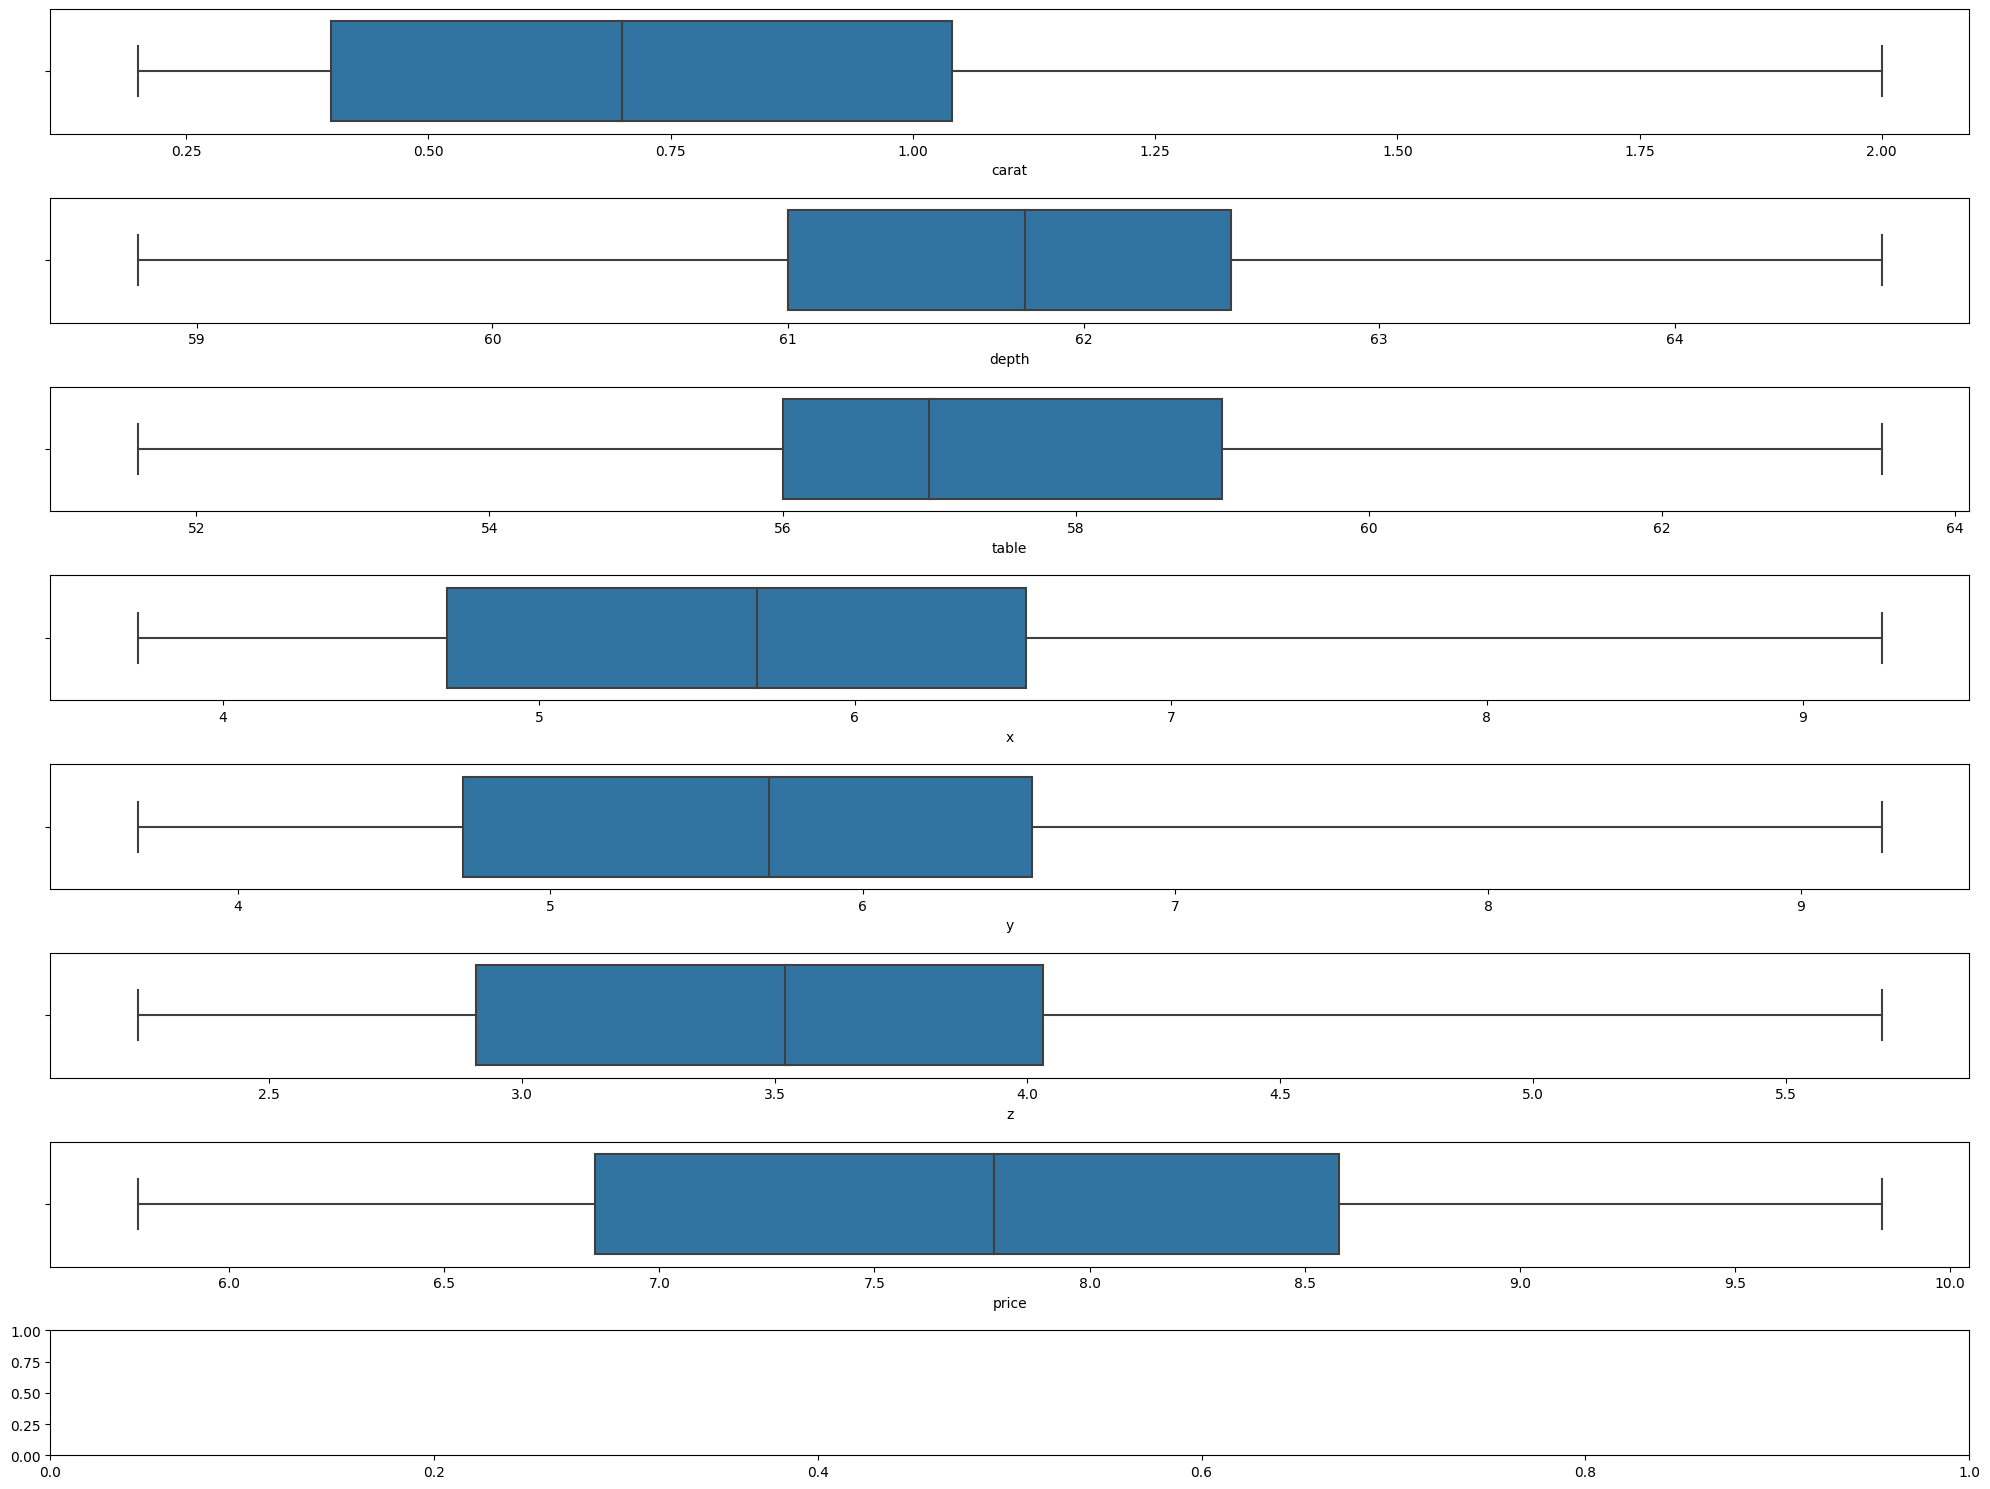

In [836]:
fig, axes = plt.subplots(nrows= 8,ncols= 1, figsize=(20,15))

for i , columna in enumerate(columnas):
    
    sns.boxplot(data = df_sinoutliers_2,
                x = columna,
                ax = axes[i])
    plt.tight_layout()

### Ahora, la variable respuesta no se puede normalizar, se prodece a estandarizar los datos.

In [837]:
# se le aplicara el metodo robust scaler ya que funciona mejor con la presencia de outliers

df_conoutliers.drop("id", axis =1, inplace = True)

In [838]:
df_conoutliers.head()

carat        cut color clarity  depth  table     x     y     z  price
0   0.30    Premium     D     SI2   62.4   58.0  4.31  4.28  2.68  6.353
1   1.01      Ideal     E    VVS2   62.7   56.0  6.42  6.46  4.04  9.183
2   0.72      Ideal     F     VS2   61.8   59.0  5.71  5.74  3.54  7.983
3   1.08  Very Good     G     SI2   63.2   57.0  6.54  6.50  4.12  8.371
4   0.36    Premium     G     VS1   62.3   59.0  4.50  4.55  2.82  6.588

In [839]:
# se le aplicar el metodo standar scaler
df_sinoutliers_2.drop("id", axis =1, inplace = True)
df_sinoutliers_2.head()

carat        cut color clarity  depth  table     x     y     z  price
0   0.30    Premium     D     SI2   62.4   58.0  4.31  4.28  2.68  6.353
1   1.01      Ideal     E    VVS2   62.7   56.0  6.42  6.46  4.04  9.183
2   0.72      Ideal     F     VS2   61.8   59.0  5.71  5.74  3.54  7.983
3   1.08  Very Good     G     SI2   63.2   57.0  6.54  6.50  4.12  8.371
4   0.36    Premium     G     VS1   62.3   59.0  4.50  4.55  2.82  6.588

In [840]:
import pickle
#ROBUSTSCALER
# construir el modelo de escalador
robust = RobustScaler() 
#generamos el pickle de esta estandarizacion
with open (f"data/estand_robust_outliers.pkl", "wb") as estandarizacion:
    pickle.dump(robust, estandarizacion)
#seleccionamos las variables predictoras numericas
df_conoutliers_num = df_conoutliers.select_dtypes(include=np.number)
num_col = df_conoutliers_num.columns.drop("price")
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(df_conoutliers[num_col])
# transformamos los datos
X_robust = robust.transform(df_conoutliers[num_col])
# se crea un data frame nuevo estandarizado
df_conoutliers_stand = df_conoutliers.copy()
# por último convertiremos el array que nos devuelve en un dataframe. 

df_conoutliers_stand[num_col] = X_robust
df_conoutliers_stand.head()

carat        cut color clarity     depth     table         x         y  \
0 -0.625000    Premium     D     SI2  0.400000  0.333333 -0.754098 -0.780220   
1  0.484375      Ideal     E    VVS2  0.600000 -0.333333  0.398907  0.417582   
2  0.031250      Ideal     F     VS2  0.000000  0.666667  0.010929  0.021978   
3  0.593750  Very Good     G     SI2  0.933333  0.000000  0.464481  0.439560   
4 -0.531250    Premium     G     VS1  0.333333  0.666667 -0.650273 -0.631868   

          z  price  
0 -0.750000  6.353  
1  0.464286  9.183  
2  0.017857  7.983  
3  0.535714  8.371  
4 -0.625000  6.588

In [841]:
#STANDARSCALER
# iniciamos el método para escalar
scaler = StandardScaler()
#seleccionamos las variables predictoras numericas
df_sinoutliers_num = df_sinoutliers_2.select_dtypes(include=np.number)
num_col = df_conoutliers_num.columns.drop("price")
# ajustamos nuestros datos
scaler.fit(df_sinoutliers_2[num_col])
#generamos el pickle de esta estandarizacion
with open (f"data/estand_standar_sin_outliers.pkl", "wb") as estandarizacion:
    pickle.dump(scaler, estandarizacion)
# transformamos los datos. 
X_escaladas = scaler.transform(df_sinoutliers_2[num_col])
#creamos df nuevo que sera el estandarizado
df_sinoutliers_stand = df_sinoutliers_2.copy()
df_sinoutliers_stand[num_col] = X_escaladas
df_sinoutliers_stand.head()


carat        cut color clarity     depth     table         x         y  \
0 -1.147387    Premium     D     SI2  0.573447  0.297165 -1.266867 -1.304288   
1  0.633437      Ideal     E    VVS2  0.845121 -0.669536  0.617984  0.656417   
2 -0.093942      Ideal     F     VS2  0.030100  0.780515 -0.016255  0.008845   
3  0.809011  Very Good     G     SI2  1.297910 -0.186186  0.725180  0.692394   
4 -0.996895    Premium     G     VS1  0.482890  0.780515 -1.097141 -1.061449   

          z  price  
0 -1.241318  6.353  
1  0.728852  9.183  
2  0.004525  7.983  
3  0.844744  8.371  
4 -1.038506  6.588

### Encoding de la variables categoricas

In [842]:
# funcion para aplicar el metodo onehotencoder a varibles categoricas SIN ORDEN
#generamos el encoder fuera para poder guardarlo en un pickle, la otra opcion es meter la generacion de pickle en la funcion del soporte
oh = OneHotEncoder()
#generamos el pickle de esta estandarizacion
"""with open (f"data/.pkl", "wb") as normalizacion:
    pickle.dump(oh, normalizacion)"""
def one_hot_encoder(dff, columnas, oh):
    
    '''
    columnas: lista columnas categoricas
    '''
    transformados = oh.fit_transform(dff[columnas])
    
    oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)
    
    dff[oh_df.columns] = oh_df
    
    dff.drop(columnas, axis = 1, inplace = True)
    
    return dff
    

In [843]:
# funcion del metodo label encoder para varibles categoricas SIN ORDEN

def label_encoder(df, columnas):
    # iniciamos el método
    le = LabelEncoder()
    for col in df[columnas].columns:
        nuevo_nombre = col + "_encoded"
        df[nuevo_nombre] = le.fit_transform(df[col])
    return df

In [844]:
#funcion para aplicar el metodo map encoder para variables categoricas CON ORDEN
#no funciona bien con outliers en la variable
#de una variable en 1, ya que hay qu aplicarle un orden
# establecemos el orden que queremos, de menos importante a más. 

orden_valores = ['southwest', 'southeast', 'northwest', 'northeast']

def ordinal_map(df, columna, orden_valores):
    ordinal_dict = {}
    
    for i, valor in enumerate(orden_valores):
        ordinal_dict[valor] = i
        
    nuevo_nombre = columna + "_mapeada"
    
    df[nuevo_nombre] = df[columna].map(ordinal_dict)
    
    return df
"""df6["region"].unique()
#output: array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)
#importante pasarle el orden_valores igual que lo ve el
df6 = ordinal_map(df6, "region", ['southwest', 'southeast', 'northwest', 'northeast'])"""

'df6["region"].unique()\n#output: array([\'southwest\', \'southeast\', \'northwest\', \'northeast\'], dtype=object)\n#importante pasarle el orden_valores igual que lo ve el\ndf6 = ordinal_map(df6, "region", [\'southwest\', \'southeast\', \'northwest\', \'northeast\'])'

In [845]:
#funcion para aplicar el metodo ordinal encoder para Variables CON ORDEN, 
#de una variable en 1, ya que hay qu aplicarle un orden
# establecemos el orden que queremos, de menos importante a más, en el orden que nosotros queramos darle el valor. 
#para el pickle el ordinal y el fit tienen que estar fiuera
orden_valores = [ "yes", "no" ]

def ordinal_encoder1(df, columna, orden_valores):
    
    # iniciamos el método y aplicamos la transformación a los datos. 
    #OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>, handle_unknown='error', unknown_value=None)
    ordinal = OrdinalEncoder(categories = [orden], dtype = int)

    transformados_oe = ordinal.fit_transform(df[[columna]])
    
    # lo convertimos a dataframe
    oe_df = pd.DataFrame(transformados_oe)
    # cambiamos el nombre de la columna
    oe_df.columns = ordinal.feature_names_in_

    columna += "_oe"
    
    # sobre escribimos la columna con los valores de la tranformación
    df[columna] = oe_df
     
    return df

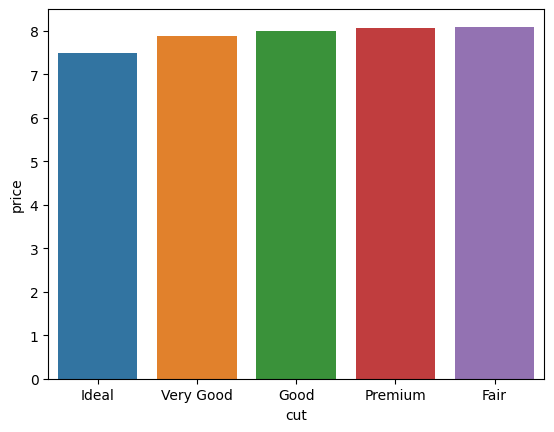

In [846]:
df_conoutliers_stand_cat = df_conoutliers_stand.select_dtypes(include="object")
df_conoutliers_stand_cat["price"] = df_conoutliers_stand["price"]
cut =  df_conoutliers_stand_cat.groupby("cut")["price"].median().reset_index().sort_values("price", ascending=True)
sns.barplot(data = cut,
                x = "cut",
                y= "price");

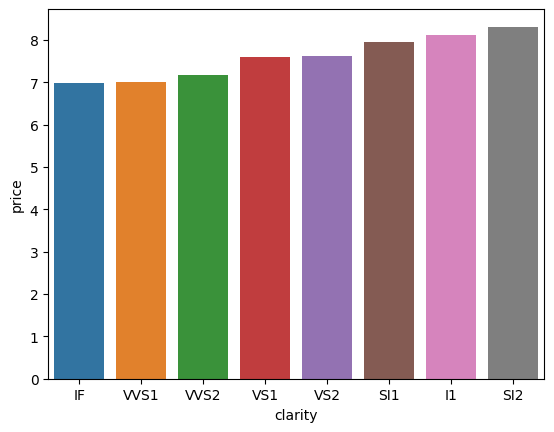

In [847]:
clarity =  df_conoutliers_stand_cat.groupby("clarity")["price"].median().reset_index().sort_values("price", ascending=True)
sns.barplot(data = clarity,
                x = "clarity",
                y= "price");

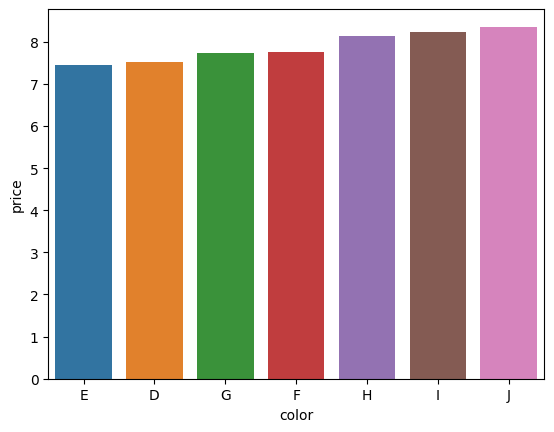

In [848]:
color =  df_conoutliers_stand_cat.groupby("color")["price"].median().reset_index().sort_values("price", ascending=True)
sns.barplot(data = color,
                x = "color",
                y= "price");

### vamos a ver las que no tienen outliers

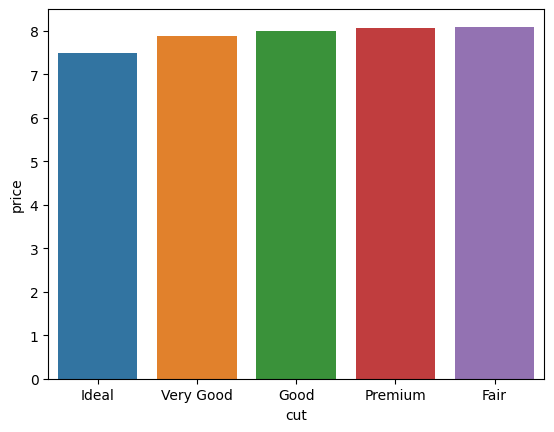

In [849]:
df_sinoutliers_stand_cat = df_sinoutliers_stand.select_dtypes(include="object")
df_sinoutliers_stand_cat["price"] = df_sinoutliers_stand["price"]
cut =  df_sinoutliers_stand_cat.groupby("cut")["price"].median().reset_index().sort_values("price", ascending=True)
sns.barplot(data = cut,
                x = "cut",
                y= "price");

["Ideal", "Very Good","Good","Premium","Fair"]

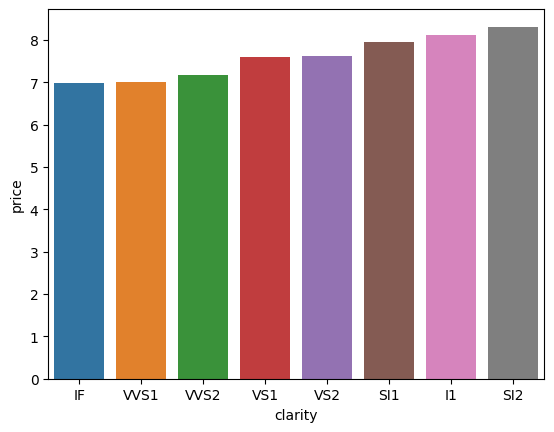

In [850]:
clarity =  df_sinoutliers_stand_cat.groupby("clarity")["price"].median().reset_index().sort_values("price", ascending=True)
sns.barplot(data = clarity,
                x = "clarity",
                y= "price");

["IF","VVS1","VVS2","VS1","VS2","SI1","I1","SI2"]

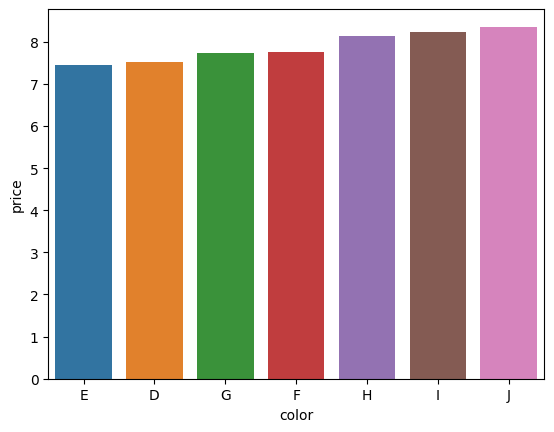

In [851]:
color =  df_sinoutliers_stand_cat.groupby("color")["price"].median().reset_index().sort_values("price", ascending=True)
sns.barplot(data = color,
                x = "color",
                y= "price");

["E","D","G","F","H","I","J"]

### las variables categoricas tienen un orden o influencia en el precio del diamante, por lo que se les aplicara el metédo ordinal encoder a todas las variables de los 2 df, con y sin outliers

In [852]:
import pickle


In [853]:
#funcion para aplicar el metodo ordinal encoder para Variables CON ORDEN, 
#de una variable en 1, ya que hay qu aplicarle un orden
# establecemos el orden que queremos, de menos importante a más, en el orden que nosotros queramos darle el valor. 
#para el pickle el ordinal y el fit tienen que estar fiuera
    # iniciamos el método y aplicamos la transformación a los datos. 
    #OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>, handle_unknown='error', unknown_value=None)
    ordinal = OrdinalEncoder(categories = [orden_valores], dtype = int)

    transformados_oe = ordinal.fit_transform(df[[columna]])

def ordinal_encoder1(df, columna, orden_valores,ordinal,transformados_oe):
    
    # lo convertimos a dataframe
    oe_df = pd.DataFrame(transformados_oe)
    # cambiamos el nombre de la columna
    oe_df.columns = ordinal.feature_names_in_
    
    # sobre escribimos la columna con los valores de la tranformación
    df[columna] = oe_df
     
    return df

In [854]:
# establecemos el orden que queremos, de menos importante a más, en el orden que nosotros queramos darle el valor. 
orden_valores = ["IF","VVS1","VVS2","VS1","VS2","SI1","I1","SI2"]
# iniciamos el método y aplicamos la transformación a los datos. 
#OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>, handle_unknown='error', unknown_value=None)
ordinal = OrdinalEncoder(dtype = int)
transformados_oe = ordinal.fit_transform(df_conoutliers_stand[["clarity"]])
#generamos el pickle de la normalizacion
with open (f"data/encoder_clarity.pkl", "wb") as encoder:
    pickle.dump(ordinal, encoder)
df_conoutliers_stand = ordinal_encoder1(df_conoutliers_stand, "clarity", orden_valores,ordinal,transformados_oe)

In [855]:
# establecemos el orden que queremos, de menos importante a más, en el orden que nosotros queramos darle el valor. 
orden_valores = ["E","D","G","F","H","I","J"]
# iniciamos el método y aplicamos la transformación a los datos. 
#OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>, handle_unknown='error', unknown_value=None)
ordinal = OrdinalEncoder(dtype = int)
transformados_oe = ordinal.fit_transform(df_conoutliers_stand[["color"]])
#generamos el pickle de la normalizacion
with open (f"data/encoder_color.pkl", "wb") as encoder:
    pickle.dump(ordinal, encoder)
df_conoutliers_stand = ordinal_encoder1(df_conoutliers_stand, "color", orden_valores,ordinal, transformados_oe)

In [856]:

# establecemos el orden que queremos, de menos importante a más, en el orden que nosotros queramos darle el valor. 
orden_valores = ["Ideal", "Very Good","Good","Premium","Fair"]
# iniciamos el método y aplicamos la transformación a los datos. 
#OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>, handle_unknown='error', unknown_value=None)
ordinal = OrdinalEncoder(dtype = int)
transformados_oe = ordinal.fit_transform(df_conoutliers_stand[["cut"]])
#generamos el pickle de la normalizacion
with open (f"data/encoder_cut.pkl", "wb") as encoder:
    pickle.dump(ordinal, encoder)
df_conoutliers_stand = ordinal_encoder1(df_conoutliers_stand, "cut", orden_valores,ordinal, transformados_oe)

In [857]:
df_conoutliers_stand.head()

carat  cut  color  clarity     depth     table         x         y  \
0 -0.625000  3.0    1.0      7.0  0.400000  0.333333 -0.754098 -0.780220   
1  0.484375  0.0    0.0      2.0  0.600000 -0.333333  0.398907  0.417582   
2  0.031250  0.0    3.0      4.0  0.000000  0.666667  0.010929  0.021978   
3  0.593750  1.0    2.0      7.0  0.933333  0.000000  0.464481  0.439560   
4 -0.531250  3.0    2.0      3.0  0.333333  0.666667 -0.650273 -0.631868   

          z  price  
0 -0.750000  6.353  
1  0.464286  9.183  
2  0.017857  7.983  
3  0.535714  8.371  
4 -0.625000  6.588

In [858]:
df_conoutliers_stand.to_csv("data/fnl_outliers.csv")

ya tenemos los datos del primer modelo con outliers listo.

### se procede con el df sin outliers.

In [859]:
df_sinoutliers_stand.head()

carat        cut color clarity     depth     table         x         y  \
0 -1.147387    Premium     D     SI2  0.573447  0.297165 -1.266867 -1.304288   
1  0.633437      Ideal     E    VVS2  0.845121 -0.669536  0.617984  0.656417   
2 -0.093942      Ideal     F     VS2  0.030100  0.780515 -0.016255  0.008845   
3  0.809011  Very Good     G     SI2  1.297910 -0.186186  0.725180  0.692394   
4 -0.996895    Premium     G     VS1  0.482890  0.780515 -1.097141 -1.061449   

          z  price  
0 -1.241318  6.353  
1  0.728852  9.183  
2  0.004525  7.983  
3  0.844744  8.371  
4 -1.038506  6.588

In [860]:
# establecemos el orden que queremos, de menos importante a más, en el orden que nosotros queramos darle el valor. 
orden_valores = ["IF","VVS1","VVS2","VS1","VS2","SI1","I1","SI2"]
# iniciamos el método y aplicamos la transformación a los datos. 
#OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>, handle_unknown='error', unknown_value=None)
ordinal = OrdinalEncoder(dtype = int)
transformados_oe = ordinal.fit_transform(df_sinoutliers_stand[["clarity"]])
#generamos el pickle de la normalizacion
with open (f"data/sin_encoder_clarity.pkl", "wb") as encoder:
    pickle.dump(ordinal, encoder)
df_sinoutliers_stand = ordinal_encoder1(df_sinoutliers_stand, "clarity", orden_valores,ordinal,transformados_oe)

In [861]:
# establecemos el orden que queremos, de menos importante a más, en el orden que nosotros queramos darle el valor. 
orden_valores = ["E","D","G","F","H","I","J"]
# iniciamos el método y aplicamos la transformación a los datos. 
#OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>, handle_unknown='error', unknown_value=None)
ordinal = OrdinalEncoder(dtype = int)
transformados_oe = ordinal.fit_transform(df_sinoutliers_stand[["color"]])
#generamos el pickle de la normalizacion
with open (f"data/sin_encoder_color.pkl", "wb") as encoder:
    pickle.dump(ordinal, encoder)
df_sinoutliers_stand = ordinal_encoder1(df_sinoutliers_stand, "color", orden_valores,ordinal, transformados_oe)

In [862]:

# establecemos el orden que queremos, de menos importante a más, en el orden que nosotros queramos darle el valor. 
orden_valores = ["Ideal", "Very Good","Good","Premium","Fair"]
# iniciamos el método y aplicamos la transformación a los datos. 
#OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>, handle_unknown='error', unknown_value=None)
ordinal = OrdinalEncoder(dtype = int)
transformados_oe = ordinal.fit_transform(df_sinoutliers_stand[["cut"]])
#generamos el pickle de la normalizacion
with open (f"data/sin_encoder_cut.pkl", "wb") as encoder:
    pickle.dump(ordinal, encoder)
df_sinoutliers_stand = ordinal_encoder1(df_sinoutliers_stand, "cut", orden_valores,ordinal, transformados_oe)

In [863]:

df_sinoutliers_stand.head()

carat  cut  color  clarity     depth     table         x         y  \
0 -1.147387  3.0    1.0      7.0  0.573447  0.297165 -1.266867 -1.304288   
1  0.633437  0.0    0.0      2.0  0.845121 -0.669536  0.617984  0.656417   
2 -0.093942  0.0    3.0      4.0  0.030100  0.780515 -0.016255  0.008845   
3  0.809011  1.0    2.0      7.0  1.297910 -0.186186  0.725180  0.692394   
4 -0.996895  3.0    2.0      3.0  0.482890  0.780515 -1.097141 -1.061449   

          z  price  
0 -1.241318  6.353  
1  0.728852  9.183  
2  0.004525  7.983  
3  0.844744  8.371  
4 -1.038506  6.588

In [864]:
df_sinoutliers_stand.to_csv("data/fnl_sinoutliers.csv")

y listo el segundo set de datos.

# ajuste del modelo.

In [865]:
"""from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# MODELING

# 1. OLS
ols = LinearRegression()
ols.fit(X_train_Buy, y_train_Buy)
ols_yhat = ols.predict(X_test_Buy)
ols_mae = mean_absolute_error(y_test_Buy, ols_yhat)
ols_yhat_Train = ols.predict(X_train_Buy)
ols_mae_Train = mean_absolute_error(y_train_Buy, ols_yhat_Train)

# 2. Ridge
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train_Buy, y_train_Buy)
ridge_yhat = ridge.predict(X_test_Buy)
ridge_mae = mean_absolute_error(y_test_Buy, ridge_yhat)
ridge_yhat_Train = ridge.predict(X_train_Buy)
ridge_mae_Train = mean_absolute_error(y_train_Buy, ridge_yhat_Train)

# 3. Lasso
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train_Buy, y_train_Buy)
lasso_yhat = lasso.predict(X_test_Buy)
lasso_mae = mean_absolute_error(y_test_Buy, lasso_yhat)
lasso_yhat_Train = lasso.predict(X_train_Buy)
lasso_mae_Train = mean_absolute_error(y_train_Buy, lasso_yhat_Train)

# 4. Bayesian
bayesian = BayesianRidge()
bayesian.fit(X_train_Buy, y_train_Buy)
bayesian_yhat = bayesian.predict(X_test_Buy)
bayesian_mae = mean_absolute_error(y_test_Buy, bayesian_yhat)
bayesian_yhat_Train = bayesian.predict(X_train_Buy)
bayesian_mae_Train = mean_absolute_error(y_train_Buy, bayesian_yhat_Train)

# 5. ElasticNet
en = ElasticNet(alpha = 0.01)
en.fit(X_train_Buy, y_train_Buy)
en_yhat = en.predict(X_test_Buy)
en_mae = mean_absolute_error(y_test_Buy, en_yhat)
en_yhat_Train = en.predict(X_train_Buy)
en_mae_Train = mean_absolute_error(y_train_Buy, en_yhat_Train)

# 6. Linear Regression
lr = LinearRegression().fit(X_train_Buy, y_train_Buy)
lr_predictions = lr.predict(X_test_Buy)
lr_mae = mean_absolute_error(y_test_Buy, lr_predictions)
lr_predictions_Train = lr.predict(X_train_Buy)
lr_mae_Train = mean_absolute_error(y_train_Buy, lr_predictions_Train)

# 7. Random Forest
rf = RandomForestRegressor(n_estimators=200).fit(X_train_Buy, y_train_Buy)
rf_predictions = rf.predict(X_test_Buy)
rf_mae = mean_absolute_error(y_test_Buy, rf_predictions)
rf_predictions_Train = rf.predict(X_train_Buy)
rf_mae_Train = mean_absolute_error(y_train_Buy, rf_predictions_Train)

# 8. XGB Regressor
model1 = XGBRegressor()  
param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [100, 200, 300, 400, 500],
              'reg_lambda': [0.1, 1.0, 10.0]}           
grid_search = GridSearchCV(model1, param_grid, cv=5, n_jobs=-1, verbose=1)  
grid_search.fit(X_train_Buy, y_train_Buy) 
xgb_pred = grid_search.predict(X_test_Buy) 
xgb_mae = mean_absolute_error(y_test_Buy, xgb_pred)
xgb_pred_Train = grid_search.predict(X_train_Buy)
xgb_mae_Train = mean_absolute_error(y_train_Buy, xgb_pred_Train)

# 9. Random Forest II
model2 = RandomForestRegressor()  
param_distributions = {'n_estimators': [100, 200, 500, 1000],   
                       'max_depth': [None, 3, 5, 7],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4]}
random_search = RandomizedSearchCV(model2, param_distributions, n_iter=10, cv=5, return_train_score=True)  
random_search.fit(X_train_Buy, y_train_Buy)  
RF_pred = random_search.predict(X_test_Buy)
RF_mae = mean_absolute_error(y_test_Buy, RF_pred)
RF_pred_Train = random_search.predict(X_train_Buy)
RF_mae_Train = mean_absolute_error(y_train_Buy, RF_pred_Train)

# 10. Bagging
bg = BaggingRegressor(n_estimators=200).fit(X_train_Buy, y_train_Buy)  
bg_predictions = bg.predict(X_test_Buy)
bg_mae = mean_absolute_error(y_test_Buy, bg_predictions)
bg_predictions_Train = bg.predict(X_train_Buy)
bg_mae_Train = mean_absolute_error(y_train_Buy, bg_predictions_Train)

# 11. Ada Boost
ab = AdaBoostRegressor(n_estimators=200).fit(X_train_Buy, y_train_Buy)  
ab_predictions = ab.predict(X_test_Buy)
ab_mae = mean_absolute_error(y_test_Buy, ab_predictions)
ab_predictions_Train = ab.predict(X_train_Buy)
ab_mae_Train = mean_absolute_error(y_train_Buy, ab_predictions_Train)

# 12. Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=200).fit(X_train_Buy, y_train_Buy)  
gb_predictions = gb.predict(X_test_Buy)
gb_mae = mean_absolute_error(y_test_Buy, gb_predictions)
gb_predictions_Train = gb.predict(X_train_Buy)
gb_mae_Train = mean_absolute_error(y_train_Buy, gb_predictions_Train)"""

"from sklearn.metrics import mean_absolute_error\nfrom xgboost import XGBRegressor\nfrom sklearn.linear_model import Lasso, Ridge\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.ensemble import BaggingRegressor\nfrom sklearn.ensemble import AdaBoostRegressor\nfrom sklearn.ensemble import GradientBoostingRegressor\n\n# MODELING\n\n# 1. OLS\nols = LinearRegression()\nols.fit(X_train_Buy, y_train_Buy)\nols_yhat = ols.predict(X_test_Buy)\nols_mae = mean_absolute_error(y_test_Buy, ols_yhat)\nols_yhat_Train = ols.predict(X_train_Buy)\nols_mae_Train = mean_absolute_error(y_train_Buy, ols_yhat_Train)\n\n# 2. Ridge\nridge = Ridge(alpha = 0.5)\nridge.fit(X_train_Buy, y_train_Buy)\nridge_yhat = ridge.predict(X_test_Buy)\nridge_mae = mean_absolute_error(y_test_Buy, ridge_yhat)\nridge_yhat_Train = ridge.predict(X_train_Buy)\nridge_mae_Train = mean_absolute_error(y_train_Buy, ridge_yhat_Train)\n\n# 3. Lasso\nlasso = Lasso(alpha = 0.01)\nlasso.fit(X_train_Buy, y_train_Buy)\nlasso_yh

In [ ]:
"""#Feature importance
import matplotlib.pyplot as plt

plt.barh(Features.index, Features.Importante_Normalized, color=(0.2, 0.4, 0.6, 0.6))
plt.title("Feature Importance - alquiler")

importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': regressor.feature_importances_})
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values(by = "importancia", ascending = False)"""


In [867]:
df_sinoutliers_final.dropna(how="any",inplace=True)
df_sinoutliers_final.isnull().sum()

carat         0
depth         0
table         0
x             0
y             0
z             0
price         0
cut_oe        0
clarity_oe    0
color_oe      0
dtype: int64

In [634]:
df_conoutliers_final.dropna(how="any",inplace=True)
df_conoutliers_final.isnull().sum()

carat         0
depth         0
table         0
x             0
y             0
z             0
price         0
clarity_oe    0
color_oe      0
cut_oe        0
dtype: int64

In [871]:
df_conoutliers_final["price"] = df_train["price"]
df_conoutliers_final.head()

carat  cut  color  clarity     depth     table         x         y  \
0 -0.625000  3.0    1.0      7.0  0.400000  0.333333 -0.754098 -0.780220   
1  0.484375  0.0    0.0      2.0  0.600000 -0.333333  0.398907  0.417582   
2  0.031250  0.0    3.0      4.0  0.000000  0.666667  0.010929  0.021978   
3  0.593750  1.0    2.0      7.0  0.933333  0.000000  0.464481  0.439560   
4 -0.531250  3.0    2.0      3.0  0.333333  0.666667 -0.650273 -0.631868   

          z  price  
0 -0.750000  6.353  
1  0.464286  9.183  
2  0.017857  7.983  
3  0.535714  8.371  
4 -0.625000  6.588

In [872]:
#df con outliers
# dividimos el dataset en variables predictoras y respuesta
X_con = df_conoutliers_final.drop("price", axis = 1) # variables predictoras
y_con = df_conoutliers_final["price"] # variable respuesta
 

In [874]:
X_train, X_test, y_train, y_test = train_test_split(X_con,y_con, test_size = 0.2, random_state = 666)

In [875]:
y_train.describe()

count    32332.000000
mean         7.782384
std          1.015048
min          5.787000
25%          6.851000
50%          7.780000
75%          8.578000
max          9.842000
Name: price, dtype: float64

In [876]:
y_test.describe()

count    8083.000000
mean        7.786891
std         1.022730
min         5.823000
25%         6.848000
50%         7.777000
75%         8.590000
max         9.842000
Name: price, dtype: float64

hay datos bastante parecidos, buenas muestras.

In [877]:
#no se puede hacer regresion logistica, solo para variables de si/no, grupos, etc
"""lr = LogisticRegression(max_iter = 100000)
lr.fit(X_train, y_train)
#sacamos la prediccion
y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)"""

'lr = LogisticRegression(max_iter = 100000)\nlr.fit(X_train, y_train)\n#sacamos la prediccion\ny_pred_lr_test = lr.predict(X_test)\ny_pred_lr_train = lr.predict(X_train)'

In [878]:
# funcion para sacar las metricas del modelo de regresion logistica.

"""results_logistic = metricas(y_test, y_pred_lr_test, y_train, y_pred_lr_train, "Regresión logistica")"""
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

regresion lineal

In [879]:
# iniciamos el método de Linear Regression
lr = LinearRegression()
# es el momento de ajustar el modelo. Para eso usaremos el método .fit() donde le tendremos que pasar las variables predictoras y la respuesta

lr.fit(X_train, y_train)

LinearRegression()

In [880]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [881]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test)})
results = pd.concat([train_df,test_df], axis = 0)
results['residual'] = results['Real'] - results['Predicted']
results.head()

Real  Predicted    Set  residual
12883  7.489   7.901380  Train -0.412380
24349  7.939   7.366868  Train  0.572132
13809  6.707   6.938538  Train -0.231538
33370  9.129   9.169437  Train -0.040437
29169  7.554   7.975689  Train -0.421689

In [882]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df
    

In [883]:
lr_results = metricas(y_test, y_train, y_pred_test, y_pred_train, "Regresion lineal")
lr_results

MAE       MSE      RMSE        R2    set            modelo
0  0.206011  0.191099  0.437148  0.817279   test  Regresion lineal
1  0.200527  0.066004  0.256912  0.935937  train  Regresion lineal

decision tree regressor

In [884]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

"""fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();
%time
"""

'fig = plt.figure(figsize=(10, 6))\ntree.plot_tree(regressor, feature_names=X_train.columns, filled=True)\nplt.show();\n%time\n'

In [885]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [886]:
# sacamos las métricas para ver si hay overfitting

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

MAE       MSE      RMSE        R2    set            modelo
0  0.258068  0.111216  0.333491  0.893659   test  Decission Tree I
1  0.000046  0.000006  0.002493  0.999994  train  Decission Tree I

claramente overfit

ajuste gridsearch

In [887]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [888]:
# ajustamos el modelo de nuevo

gs.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [889]:
# sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_

best_tree = gs.best_estimator_
best_tree


DecisionTreeRegressor(max_depth=7, max_features=5, min_samples_split=100)

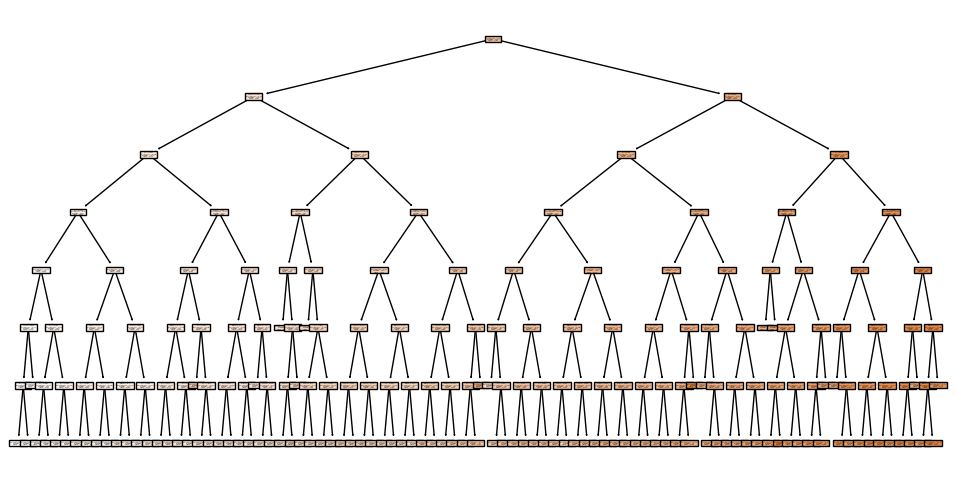

In [890]:
# volvamos a intentar visualizar el árbol a ver como se ve: 

fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);

In [891]:
#prediccion
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)


In [892]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2

MAE       MSE      RMSE        R2    set            modelo
0  0.191430  0.059367  0.243653  0.943236   test  Decision tree II
1  0.187645  0.057006  0.238760  0.944670  train  Decision tree II

In [893]:
df_all = pd.concat([lr_results, dt_results1, dt_results2], axis = 0)
df_all

MAE       MSE      RMSE        R2    set            modelo
0  0.206011  0.191099  0.437148  0.817279   test  Regresion lineal
1  0.200527  0.066004  0.256912  0.935937  train  Regresion lineal
0  0.258068  0.111216  0.333491  0.893659   test  Decission Tree I
1  0.000046  0.000006  0.002493  0.999994  train  Decission Tree I
0  0.191430  0.059367  0.243653  0.943236   test  Decision tree II
1  0.187645  0.057006  0.238760  0.944670  train  Decision tree II

XGB REGRESSOR

In [894]:
# 8. XGB Regressor
xgb = XGBRegressor(learning_rate=0.01, n_estimators=1000, max_depth=5)
xgb.fit(X_train, y_train)
#prediccion
y_pred_test_xgb= xgb.predict(X_test)
y_pred_train_xgb = xgb.predict(X_train)



In [895]:
xgb_results = metricas(y_test, y_train, y_pred_test, y_pred_train, " XGB Regressor")
xgb_results

MAE       MSE      RMSE        R2    set          modelo
0  0.206011  0.191099  0.437148  0.817279   test   XGB Regressor
1  0.200527  0.066004  0.256912  0.935937  train   XGB Regressor

gradient boosting

In [896]:
# 12. Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=200)
gb.fit(X_train, y_train)
#prediccion
y_pred_test_gb= gb.predict(X_test)
y_pred_train_gb = gb.predict(X_train)



In [897]:
gb_results = metricas(y_test, y_train, y_pred_test, y_pred_train, " GradientBoosting regressor")
gb_results

MAE       MSE      RMSE        R2    set                       modelo
0  0.206011  0.191099  0.437148  0.817279   test   GradientBoosting regressor
1  0.200527  0.066004  0.256912  0.935937  train   GradientBoosting regressor

RandomForest

In [898]:
df_conoutliers_final.head()

carat  cut  color  clarity     depth     table         x         y  \
0 -0.625000  3.0    1.0      7.0  0.400000  0.333333 -0.754098 -0.780220   
1  0.484375  0.0    0.0      2.0  0.600000 -0.333333  0.398907  0.417582   
2  0.031250  0.0    3.0      4.0  0.000000  0.666667  0.010929  0.021978   
3  0.593750  1.0    2.0      7.0  0.933333  0.000000  0.464481  0.439560   
4 -0.531250  3.0    2.0      3.0  0.333333  0.666667 -0.650273 -0.631868   

          z  price  
0 -0.750000  6.353  
1  0.464286  9.183  
2  0.017857  7.983  
3  0.535714  8.371  
4 -0.625000  6.588

In [899]:
param = {"max_depth": [ 6, 7,8,9,10],#desppues de sacar el besttree estimator se ajustan estor hiperparametros
        "min_samples_split": [10, 15,20],
        "max_features": [3,4,5,6],
         'min_samples_leaf': [10,15,20,40,50]}# aqui despues de ver el best estimator, se ajustan y se quitan hiperparametros.

bosque = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [900]:
bosque.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'max_features': [3, 4, 5, 6],
                         'min_samples_leaf': [10, 15, 20, 40, 50],
                         'min_samples_split': [10, 15, 20]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [901]:
#se miran estos parametros y se ajusta el modelo(mas arriba)
bos = bosque.best_estimator_
bos

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=10,
                      min_samples_split=20)

In [902]:
"""for arbol in tqdm(bos.estimators_):
    tree.plot_tree(arbol, feature_names= X_train.columns, filled = True)
    plt.show()"""

'for arbol in tqdm(bos.estimators_):\n    tree.plot_tree(arbol, feature_names= X_train.columns, filled = True)\n    plt.show()'

In [903]:
#prediccion
y_pred_test_rf = bos.predict(X_test)
y_pred_train_rf = bos.predict(X_train)


In [904]:
rf_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
rf_results

MAE       MSE      RMSE        R2    set         modelo
0  0.183580  0.054497  0.233446  0.947892   test  Random Forest
1  0.174098  0.049442  0.222356  0.952012  train  Random Forest

In [905]:
df_all_outliers = pd.concat([df_all,xgb_results, gb_results, rf_results], axis = 0)
df_all_outliers

MAE       MSE      RMSE        R2    set                       modelo
0  0.206011  0.191099  0.437148  0.817279   test             Regresion lineal
1  0.200527  0.066004  0.256912  0.935937  train             Regresion lineal
0  0.258068  0.111216  0.333491  0.893659   test             Decission Tree I
1  0.000046  0.000006  0.002493  0.999994  train             Decission Tree I
0  0.191430  0.059367  0.243653  0.943236   test             Decision tree II
1  0.187645  0.057006  0.238760  0.944670  train             Decision tree II
0  0.206011  0.191099  0.437148  0.817279   test                XGB Regressor
1  0.200527  0.066004  0.256912  0.935937  train                XGB Regressor
0  0.206011  0.191099  0.437148  0.817279   test   GradientBoosting regressor
1  0.200527  0.066004  0.256912  0.935937  train   GradientBoosting regressor
0  0.183580  0.054497  0.233446  0.947892   test                Random Forest
1  0.174098  0.049442  0.222356  0.952012  train                Random Forest

In [906]:
#generamos el pickle del mejor modelo con outliers:
with open (f"data/rdm_forest_outliers.pkl", "wb") as modelo:
    pickle.dump(bos, modelo)

# Se limpia el set de datos del test

se aplica el modelo random forest que es el que tiene mejores metricas

In [907]:
df_test = pd.read_csv("data/test.csv")
df_test.drop("id", axis =1, inplace=True)
df_test.head()

carat      cut color clarity  depth  table     x     y     z
0   0.32    Ideal     I     SI1   60.5   58.0  4.43  4.49  2.70
1   1.24  Premium     I     SI1   62.9   60.0  6.80  6.74  4.26
2   1.66  Premium     D     SI1   62.0   59.0  7.55  7.60  4.70
3   0.75  Premium     D     SI2   60.6   56.0  5.94  5.90  3.59
4   1.50     Fair     E     SI2   64.8   55.0  7.26  7.15  4.67

In [908]:
df_test.select_dtypes(include = "object").columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [909]:
df_test_cat= df_test[['cut', 'color', 'clarity']]

In [910]:
# encoding 
with open('data/encoder_cut.pkl', 'rb') as encoder:
    encoder = pickle.load(encoder)
    

In [911]:
#esta funcion no sirve, el fit hay que hacerlo fuera, para que se genere el pickle

df_test_encode1 = pd.DataFrame(encoder.transform(df_test[['cut']]), columns =['cut'] )
df_test_encode1.head()

cut
0    2
1    3
2    3
3    3
4    0

In [912]:
# encoding 
with open('data/encoder_color.pkl', 'rb') as encoder:
    encoder = pickle.load(encoder)

In [913]:
df_test_encode2 = pd.DataFrame(encoder.transform(df_test[['color']]), columns =['color'] )
df_test_encode2.head()

color
0      5
1      5
2      0
3      0
4      1

In [914]:
# encoding 
with open('data/encoder_clarity.pkl', 'rb') as encoder:
    encoder = pickle.load(encoder)

In [915]:
df_test_encode3 = pd.DataFrame(encoder.transform(df_test[['clarity']]), columns =['clarity'] )
df_test_encode3.head()

clarity
0        2
1        2
2        2
3        3
4        3

In [916]:
dftest_num = df_test.select_dtypes(include = np.number)
lista= dftest_num.columns.to_list
lista

<bound method IndexOpsMixin.tolist of Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')>

In [917]:

from sklearn.preprocessing import StandardScaler
import pickle

# cargar el archivo que contiene el modelo entrenado anteriormente
with open('data/estand_standar_sin_outliers.pkl', 'rb') as f:
    scaler = pickle.load(f)

df_test_stand = pd.DataFrame(scaler.transform(df_test[['carat', 'depth', 'table', 'x', 'y', 'z']]), columns =['carat', 'depth', 'table', 'x', 'y', 'z'] )
df_test_stand.head()

carat     depth     table         x         y         z
0 -1.097223 -1.147152  0.297165 -1.159672 -1.115413 -1.212345
1  1.210323  1.026237  1.263865  0.957436  0.908251  1.047556
2  2.263769  0.211216  0.780515  1.627407  1.681740  1.684964
3 -0.018696 -1.056594 -0.669536  0.189203  0.152750  0.076958
4  1.862456  2.746837 -1.152886  1.368352  1.277008  1.641504

In [918]:
df_test_final = pd.concat([df_test_stand,df_test_encode1,df_test_encode2,df_test_encode3], axis = 1)
df_test_final.head()

carat     depth     table         x         y         z  cut  color  \
0 -1.097223 -1.147152  0.297165 -1.159672 -1.115413 -1.212345    2      5   
1  1.210323  1.026237  1.263865  0.957436  0.908251  1.047556    3      5   
2  2.263769  0.211216  0.780515  1.627407  1.681740  1.684964    3      0   
3 -0.018696 -1.056594 -0.669536  0.189203  0.152750  0.076958    3      0   
4  1.862456  2.746837 -1.152886  1.368352  1.277008  1.641504    0      1   

   clarity  
0        2  
1        2  
2        2  
3        3  
4        3

In [919]:
#le pongo el mismo prden a las columnas a los sets de train y test, sino no seria capaz de hacer las predicciones

column_order = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

df_test_final = df_test_final.reindex(column_order, axis=1)

df_test_final.head()

carat  cut  color  clarity     depth     table         x         y  \
0 -1.097223    2      5        2 -1.147152  0.297165 -1.159672 -1.115413   
1  1.210323    3      5        2  1.026237  1.263865  0.957436  0.908251   
2  2.263769    3      0        2  0.211216  0.780515  1.627407  1.681740   
3 -0.018696    3      0        3 -1.056594 -0.669536  0.189203  0.152750   
4  1.862456    0      1        3  2.746837 -1.152886  1.368352  1.277008   

          z  
0 -1.212345  
1  1.047556  
2  1.684964  
3  0.076958  
4  1.641504

In [920]:
# cargar el fichero con el escalador
# Aplicar ese escalador sobbre tu test. 
# haces la prediccion
# best_tree.predic(df_test)

In [921]:
df_test_final.shape

(13485, 9)

# se hace la prediccion del mejor modelo

In [922]:
# cargamos el mejor modelo
with open('data/rdm_forest_outliers.pkl', 'rb') as modelo:
    modelo = pickle.load(modelo)

In [923]:
df_conoutliers_final.head()

carat  cut  color  clarity     depth     table         x         y  \
0 -0.625000  3.0    1.0      7.0  0.400000  0.333333 -0.754098 -0.780220   
1  0.484375  0.0    0.0      2.0  0.600000 -0.333333  0.398907  0.417582   
2  0.031250  0.0    3.0      4.0  0.000000  0.666667  0.010929  0.021978   
3  0.593750  1.0    2.0      7.0  0.933333  0.000000  0.464481  0.439560   
4 -0.531250  3.0    2.0      3.0  0.333333  0.666667 -0.650273 -0.631868   

          z  price  
0 -0.750000  6.353  
1  0.464286  9.183  
2  0.017857  7.983  
3  0.535714  8.371  
4 -0.625000  6.588

In [924]:
resultado1 = pd.DataFrame(modelo.predict(df_test_final), columns = ["price"]).reset_index()
resultado1.rename(columns = {"index": "id"}, inplace = True)
resultado1.head()

id     price
0   0  5.934497
1   1  9.168804
2   2  9.651625
3   3  7.915454
4   4  9.213049

In [925]:
resultado1.shape

(13485, 2)

In [926]:
resultado1.to_csv("data/modelo_con.csv", index = False)